**Name:** Ho Teng Hwong, Andrew

**Last Updated Date:** Tuesday, 27 July 2021

# Executive Summary

The purpose of this report is to analyze the general profile of clients whom currently hold an insurance plan with an insurance company. It also aims to determine whether these clients would default their premium payments based on a certain set of characteristics / profile. From the EDA analysis, marital status, income, sourcing channels and area of residence seemed to be the contributing factors in clients defaulting.

During the analysis, it was noted that the data had a few outliers and some variables had to be treated as categorical variables. In addition, one-hot encoding and balancing of data was applied on the data set in order to have a better analysis.

After performing data manipulation and analysis, machine learning models were then built and used to determine if the above analysis were valid by predicting the whether a client is likely to default his or her payment based on a given set of characteristics / profile. Data was split, trained and tested. Test evaluation methods such as accuracy, F1 score using the confusion matrix and AUC were applied onto the models for validation.

Finally, the report gave its conclusions and recommendations, whereby the firm could relook into exploring better adjusting their premium payments according to the certain set of characteristics / profile that defaulters are likely to have.
<br>
<br>
# Introduction

## Problem Statement
Premiums paid by clients are a major revenue source for insurance companies. Default in premium payments results in significant revenue losses.

## Need of the Study / Project
It would be in the best interest for insurance companies to know upfront what type of clients would likely become defaulters. This is so that companies can revise their premiums and adjust accordingly to better suit these type of clients. They may also relook into their follow-up services to ensure that these high risk clients pay their premiums promptly or are given other avenues to make payments possible.

## Objective / Opportunity
Analytics and machine learning can help identify these clients. What this project aims to do is to predict the probability that a client will default the premium payment, so that companies can revise their premiums and adjust accordingly to better suit these type of clients.
<br>
<br>
# Data Report & Exploratory Data Analysis (EDA)

## Data Analysis & Preparation
We begin with loading the data set and all the required libraries / packages.

In [1]:
import pandas as pd # Used for data manipulation
import seaborn as sns # Used for plotting
import matplotlib.pyplot as plt # Used for plotting
import numpy as np # Used for scientific and mathematical calculations
import math # Used for mathematical functions
from scipy.stats import ttest_ind # Used for t-test
import statsmodels.api as sm # Used for statistical tests
from statsmodels.formula.api import ols # Used for ANOVA tests
import scipy.stats as ss # Used for statistical estimations
import random # Used for random number generation
from sklearn import preprocessing # Used for data preprocessing
from sklearn.model_selection import train_test_split # Used for automatically splitting data
from sklearn import metrics # Used for error metrics
from sklearn import tree # Used working with tree
from sklearn.tree import DecisionTreeClassifier # Used for Decision Tree classifier
from sklearn.ensemble import RandomForestClassifier # For Random Forest Model
from sklearn.linear_model import LogisticRegression # For Logistic Regression Model
from sklearn.model_selection import cross_val_score # for cross validation
from sklearn.metrics import confusion_matrix # to create a confusion matrix
from sklearn.metrics import plot_confusion_matrix # to draw a confusion matrix
from sklearn.tree import plot_tree # to draw a classification tree
%matplotlib inline

# Load data set
df = pd.read_excel('Insurance Premium Default-Dataset.xlsx')
data_dict = pd.read_excel('Insurance Premium Default-Data Dictionary.xlsx')
#df.head(5) # Print first 5 rows

A list of all the column names and description has been provided to better understand what each feature means:

In [2]:
# To view all length of a column
pd.set_option('display.max_colwidth', 150)
#display(data_dict)

First, it has been observed that there are a few inconsistencies and lack of clarity in the column names' naming convention.

Second, the elements for some of the categorical attributes that are showing numeric values such as `Marital Status`, `Accomodation` and `default` may bring about confusion.

For example, married is tagged as 1, and unmarried is tagged as 0. When this is analyzed on a count plot, the element descriptions are not available and will be confusing to others when performing the initial analysis.

Third, there is no clarity on whether `Income` is determined as per day, month or year. We shall rename it as `income_per_year`.

Fourth, it would be better to identify the customers' age in years instead of days. We shall convert `age_in_days` to `age_in_years` accordingly.

Fifth, there is no clarity on what `premium` means. We shall rename it as `premium_paid` as per the description.

For the sake of better formatting, we will now correct them in both `df` and `data_dict`.

In [3]:
# Rename column names from df
df = df.rename(columns = {
    'Income': 'income_per_year',
    'age_in_days': 'age_in_years',
    'Marital Status': 'marital_status',
    'Veh_Owned': 'vehicles_owned',
    'Count_3-6_months_late': 'count_3_to_6_months_late',
    'Count_6-12_months_late': 'count_6_to_12_months_late',
    'Count_more_than_12_months_late': 'count_more_than_12_months_late',
    'Risk_score': 'risk_score',
    'No_of_dep': 'no_of_dependents',
    'Accomodation': 'accommodation',
    'premium': 'premium_paid'
    },inplace = False)

# Rename elements for martial_status, accommodation and default
df['marital_status'] = df['marital_status'].astype(str)
df['accommodation'] = df['accommodation'].astype(str)
df['default'] = df['default'].astype(str)

df['marital_status'] = df['marital_status'].replace({'1': 'Married', '0': 'Unmarried'})
df['accommodation'] = df['accommodation'].replace({'1': 'Owned', '0': 'Rented'})
df['default'] = df['default'].replace({'1': 'Non-Defaulter', '0': 'Defaulter'})

df['age_in_years'] = round(df['age_in_years']/365)

df.head(5) # Print first 5 rows

,id,perc_premium_paid_by_cash_credit,age_in_years,income_per_year,count_3_to_6_months_late,count_6_to_12_months_late,count_more_than_12_months_late,marital_status,vehicles_owned,no_of_dependents,accommodation,risk_score,no_of_premiums_paid,sourcing_channel,residence_area_type,premium_paid,default
0,1,0.317,31.0,90050,0,0,0,Unmarried,3,3,Owned,98.810,8,A,Rural,5400,Non-Defaulter
1,2,0.000,83.0,156080,0,0,0,Married,3,1,Owned,99.066,3,A,Urban,11700,Non-Defaulter
2,3,0.015,44.0,145020,1,0,0,Unmarried,1,1,Owned,99.170,14,C,Urban,18000,Non-Defaulter
3,4,0.000,65.0,187560,0,0,0,Married,1,1,Rented,99.370,13,A,Urban,13800,Non-Defaulter
4,5,0.888,53.0,103050,7,3,4,Unmarried,2,1,Rented,98.800,15,A,Urban,7500,Defaulter


The report shall update the same for `data_dict`.

In [4]:
data_dict['Column Name'] = data_dict['Column Name'].replace({
    'Income': 'income_per_year',
    'age_in_days': 'age_in_years',
    'Marital Status': 'marital_status',
    'Veh_owned': 'vehicles_owned',
    'Count_3-6_months_late': 'count_3_to_6_months_late',
    'Count_6-12_months_late': 'count_6_to_12_months_late',
    'Count_more_than_12_months_late': 'count_more_than_12_months_late',
    'Risk_score': 'risk_score',
    'No_of_dep': 'no_of_dependents',
    'Accommodation': 'accommodation',
    'premium': 'premium_paid'
    })

data_dict['Description'] = data_dict['Description'].replace({
    'Income of the customer': 'Income of the customer per year',
    'Age of the customer in days': 'Age of the customer in years',
})

pd.set_option('display.max_colwidth', 150)
display(data_dict)

,Column Name,Description
0,id,Unique customer ID
1,perc_premium_paid_by_cash_credit,What % of the premium was paid by cash payments?
2,age_in_years,Age of the customer in years
3,income_per_year,Income of the customer per year
4,marital_status,"Married/Unmarried, Married (1), unmarried (0)"
5,vehicles_owned,Number of vehicles owned (1-3)
6,count_3_to_6_months_late,Number of times premium was paid 3-6 months late
7,count_6_to_12_months_late,Number of times premium was paid 6-12 months late
8,count_more_than_12_months_late,Number of times premium was paid more than 12 months late
9,risk_score,Risk score of customer (similar to credit score)


The report shall now observe the dimension of the data set:

In [5]:
df.shape

(79853, 17)

The data set contains information about **79,853 policy holders, 16 predictors and 1 outcome (response)**.

However, at this instance, `id` as a variable does not seem useful to us. It shall hence be removed from the data set for the time being since it is just a simple unique number to represent each client. Therefore, the **16 predictors** have now become **15 predictors** instead.

In the event it is required to identify client(s) where analysis and machine learning prediction are concerned, the `id` can be set as a row index instead. This way, the `id` for each client will always be available for ease of reference and identification.

In [6]:
df.index = df['id'] # Setting variable ID as an index
df = df.drop(['id'], axis = 1) # Delete ID, whereby axis refers to column

After setting the ID as a row index, the data set shall now be checked for any missing values:

In [7]:
df.isna().sum()

perc_premium_paid_by_cash_credit    0
age_in_years                        0
income_per_year                     0
count_3_to_6_months_late            0
count_6_to_12_months_late           0
count_more_than_12_months_late      0
marital_status                      0
vehicles_owned                      0
no_of_dependents                    0
accommodation                       0
risk_score                          0
no_of_premiums_paid                 0
sourcing_channel                    0
residence_area_type                 0
premium_paid                        0
default                             0
dtype: int64

The data set does not appear to contain any missing values. Thus, its attributes can now be observed:

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 79853 entries, 1 to 79853
Data columns (total 16 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   perc_premium_paid_by_cash_credit  79853 non-null  float64
 1   age_in_years                      79853 non-null  float64
 2   income_per_year                   79853 non-null  int64  
 3   count_3_to_6_months_late          79853 non-null  int64  
 4   count_6_to_12_months_late         79853 non-null  int64  
 5   count_more_than_12_months_late    79853 non-null  int64  
 6   marital_status                    79853 non-null  object 
 7   vehicles_owned                    79853 non-null  int64  
 8   no_of_dependents                  79853 non-null  int64  
 9   accommodation                     79853 non-null  object 
 10  risk_score                        79853 non-null  float64
 11  no_of_premiums_paid               79853 non-null  int64  
 12  sour

The `info` method here is quite helpful. From this alone, it can be observed that:

* There are a total **16 columns**
* There are no missing values (79,853 non-null values in all columns)
* There are 2 columns of float64, 12 of int64 and 2 of object type (not numeric)
* Although there are a lot of numeric variables, `data_dict` has helped to identify that some of them are in fact supposed to be categorical variables instead.

As a result, there is a need to change some of the variables' types. They are:

* `marital_status`
* `vehicles_owned`
* `count_3_to_6_months_late`
* `count_6_to_12_months_late`
* `count_more_than_12_months_late`
* `no_of_dependents`
* `accommodation`
* `sourcing_channel`
* `residence_area_type`
* `default`

We shall now convert the mentioned numerical variables to categorical variables and observe them again after conversion:

In [9]:
df['marital_status'] = df['marital_status'].astype(object)
df['vehicles_owned'] = df['vehicles_owned'].astype(object)
df['count_3_to_6_months_late'] = df['count_3_to_6_months_late'].astype(object)
df['count_6_to_12_months_late'] = df['count_6_to_12_months_late'].astype(object)
df['count_more_than_12_months_late'] = df['count_more_than_12_months_late'].astype(object)
df['no_of_dependents'] = df['no_of_dependents'].astype(object)
df['accommodation'] = df['accommodation'].astype(object)
df['sourcing_channel'] = df['sourcing_channel'].astype(object)
df['residence_area_type'] = df['residence_area_type'].astype(object)
df['default'] = df['default'].astype(object)
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 79853 entries, 1 to 79853
Data columns (total 16 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   perc_premium_paid_by_cash_credit  79853 non-null  float64
 1   age_in_years                      79853 non-null  float64
 2   income_per_year                   79853 non-null  int64  
 3   count_3_to_6_months_late          79853 non-null  object 
 4   count_6_to_12_months_late         79853 non-null  object 
 5   count_more_than_12_months_late    79853 non-null  object 
 6   marital_status                    79853 non-null  object 
 7   vehicles_owned                    79853 non-null  object 
 8   no_of_dependents                  79853 non-null  object 
 9   accommodation                     79853 non-null  object 
 10  risk_score                        79853 non-null  float64
 11  no_of_premiums_paid               79853 non-null  int64  
 12  sour

All variables now appear to be in their correct types.

In [10]:
df.isna().sum()

perc_premium_paid_by_cash_credit    0
age_in_years                        0
income_per_year                     0
count_3_to_6_months_late            0
count_6_to_12_months_late           0
count_more_than_12_months_late      0
marital_status                      0
vehicles_owned                      0
no_of_dependents                    0
accommodation                       0
risk_score                          0
no_of_premiums_paid                 0
sourcing_channel                    0
residence_area_type                 0
premium_paid                        0
default                             0
dtype: int64

We shall now store them as categorical and numerical predictors respectively.

In [11]:
# For categorical (selecting all names of columns that are categorical):
categoricals = [
    'marital_status',
    'vehicles_owned',
    'count_3_to_6_months_late',
    'count_6_to_12_months_late',
    'count_more_than_12_months_late',
    'no_of_dependents',
    'accommodation',
    'sourcing_channel',
    'residence_area_type',
    'default'
    ]
categoricals

['marital_status',
 'vehicles_owned',
 'count_3_to_6_months_late',
 'count_6_to_12_months_late',
 'count_more_than_12_months_late',
 'no_of_dependents',
 'accommodation',
 'sourcing_channel',
 'residence_area_type',
 'default']

In [12]:
# For numerical (selecting all other columns that are not categorical):
numericals = [x for x in df.columns if x not in categoricals]
numericals

['perc_premium_paid_by_cash_credit',
 'age_in_years',
 'income_per_year',
 'risk_score',
 'no_of_premiums_paid',
 'premium_paid']

Although `default` is a categorical variable, it is also a classification variable. Therefore, this variable will be excluded from the data set.

In [13]:
categoricals.remove('default')
categoricals

['marital_status',
 'vehicles_owned',
 'count_3_to_6_months_late',
 'count_6_to_12_months_late',
 'count_more_than_12_months_late',
 'no_of_dependents',
 'accommodation',
 'sourcing_channel',
 'residence_area_type']

The storing of categorical and numeric predictors is now complete.

## Analyzing Categorical and Numerical Variable Analysis
We need to have an overview and understanding of each of the variables (categorical and numerical). Therefore, visual  plots were used to determine:

* the number of defaulters and non-defaulters
* the univariate analysis of all variables for all clients
* the univariate analysis of all variables for defaulters

We will analyze the numerical variables first, followed by the categorical variables.

## Numerical Variable Analysis
A descriptive statistics overview of all numerical variables are as shown for all 79,853 clients.


In [14]:
# Descriptive statistics for all clients
pd.options.display.float_format = "{:.2f}".format

# Using df[numericals] or df both works as .describe() only returns numerical predictors anyway
df[numericals].describe()

,perc_premium_paid_by_cash_credit,age_in_years,income_per_year,risk_score,no_of_premiums_paid,premium_paid
count,79853.00,79853.00,79853.00,79853.00,79853.00,79853.00
mean,0.31,51.61,208847.17,99.07,10.86,10924.51
std,0.33,14.27,496582.60,0.73,5.17,9401.68
min,0.00,21.00,24030.00,91.90,2.00,1200.00
25%,0.03,41.00,108010.00,98.83,7.00,5400.00
50%,0.17,51.00,166560.00,99.18,10.00,7500.00
75%,0.54,62.00,252090.00,99.52,14.00,13800.00
max,1.00,103.00,90262600.00,99.89,60.00,60000.00


For reference, descriptive statistics for defaulters and non-defaulters are also provided separately.

In [15]:
# Setting defaulter df
df_copy1 = df.copy()
is_defaulter =  df_copy1['default'] == 'Defaulter'
df_defaulter = df_copy1[is_defaulter]
#df_defaulter.head()

# Setting non-defaulter df
is_not_defaulter = df_copy1['default'] == 'Non-Defaulter'
df_not_defaulter = df_copy1[is_not_defaulter]
#df_not_defaulter.head()

In [16]:
# Descriptive statistics for defaulters
df_defaulter.describe()

,perc_premium_paid_by_cash_credit,age_in_years,income_per_year,risk_score,no_of_premiums_paid,premium_paid
count,4998.00,4998.00,4998.00,4998.00,4998.00,4998.00
mean,0.63,46.36,177058.80,98.88,10.41,9599.52
std,0.35,12.77,207754.30,0.86,5.78,8610.73
min,0.00,21.00,24030.00,92.24,2.00,1200.00
25%,0.32,37.00,90102.50,98.56,6.00,5400.00
50%,0.73,46.00,138100.00,99.07,10.00,7500.00
75%,0.97,54.00,210725.00,99.46,14.00,11700.00
max,1.00,101.00,7500070.00,99.89,59.00,60000.00


In [17]:
# Descriptive statistics for non-defaulters
df_not_defaulter.describe()

,perc_premium_paid_by_cash_credit,age_in_years,income_per_year,risk_score,no_of_premiums_paid,premium_paid
count,74855.00,74855.00,74855.00,74855.00,74855.00,74855.00
mean,0.29,51.96,210969.65,99.08,10.89,11012.98
std,0.32,14.30,510005.94,0.71,5.13,9445.57
min,0.00,21.00,24030.00,91.90,2.00,1200.00
25%,0.03,41.00,109130.00,98.85,7.00,5400.00
50%,0.15,51.00,168870.00,99.19,10.00,7500.00
75%,0.49,62.00,255050.00,99.53,14.00,13800.00
max,1.00,103.00,90262600.00,99.89,60.00,60000.00


Plotting the frequencies using histograms:

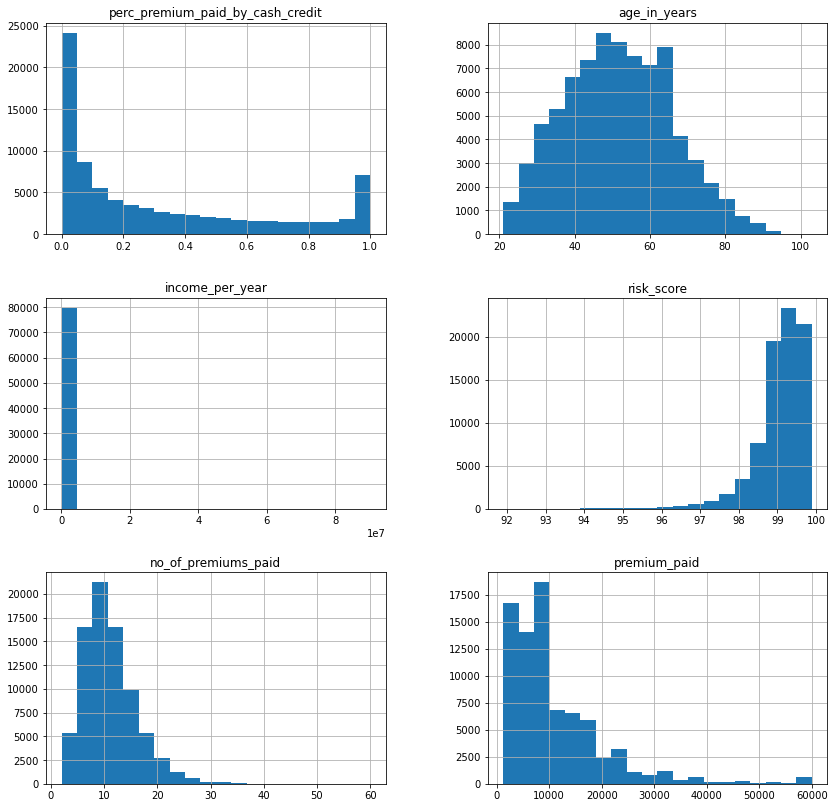

In [18]:
fig = df[numericals].hist(xlabelsize=10,ylabelsize=10,figsize=(14,14),bins=20)
#[x.title.set_size(12) for x in fig.ravel()]
plt.show()

It can be noted that these variables do not have normal distributions.

For `income_per_year` variable, it has a very long right tail. This will negatively impact the machine learning models later if it is not addressed. One way to fix this would be to apply **logarithmic transformation** to this variable.

The log transformation can be used to make highly skewed distributions less skewed. This can be valuable both for making patterns in the data more interpretable and for helping to meet the assumptions of inferential statistics.

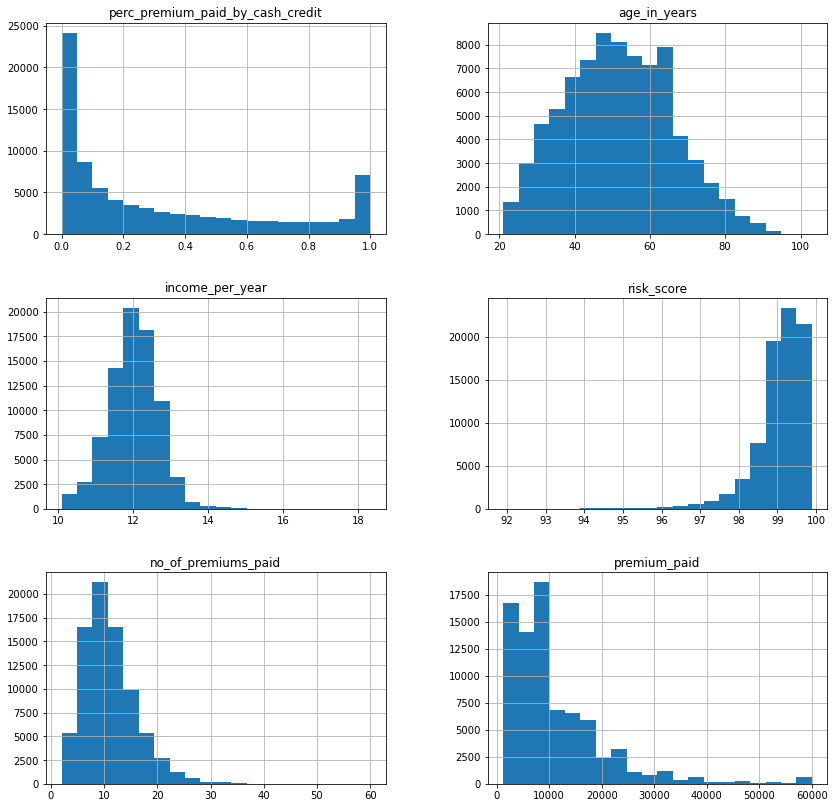

In [19]:
df.income_per_year = np.log(df.income_per_year)
df[numericals].hist(xlabelsize=10,ylabelsize=10,figsize=(14,14),bins=20)
#[x.title.set_size(16) for x in fig.ravel()]
plt.show()

In addition to histograms, scatter plots can also be used on the continuous variables to understand the relationship between them.

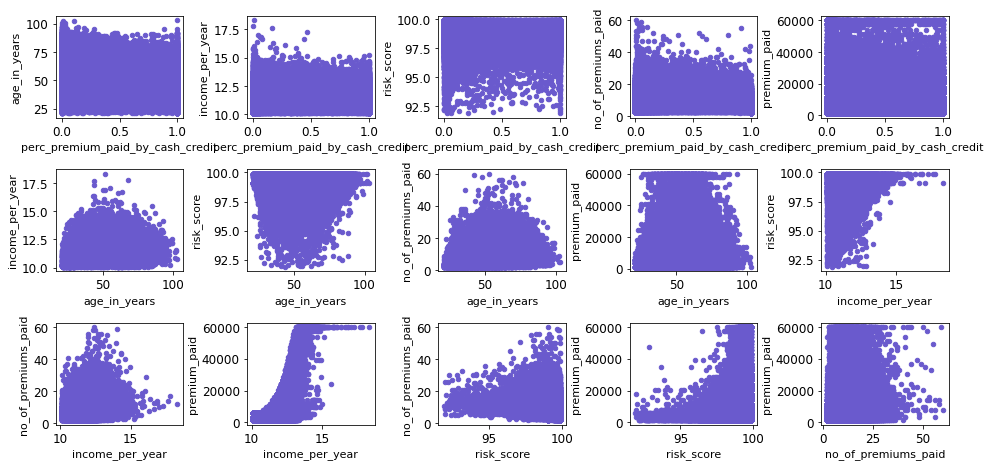

In [20]:
fig = plt.figure(figsize=(10,10))
fig.subplots_adjust(hspace=0.5, wspace=0.5)
k = 1
n = len(numericals)
for i in range(0,n):
    for j in range(i,n):
        if i!=j:
            ax = fig.add_subplot(6,5,k)
            ax.xaxis.label.set_size(11)
            ax.yaxis.label.set_size(11)
            ax.xaxis.set_tick_params(labelsize=12)
            ax.yaxis.set_tick_params(labelsize=12)
            df[numericals].plot.scatter(x=numericals[i],
                                        y=numericals[j],
                                        c="slateblue",
                                        figsize=(16,16),ax=ax)
            k = k + 1
plt.show()

Unfortunately, any evidence of linear dependencies could not be observed for the scatter plots. Thus, we can consider using correlation matrix for confirmation instead.

For the correlation matrix, the correlations between numeric variables will be observed. If any of them are to have high correlated values **(assuming 0.8 or greater)**, they would have to be removed in order to avoid the multicollinearity problem.

Multicollinearity is when independent variables in a regression model are correlated. This correlation is a problem because independent variables should be independent. If the degree of correlation between variables is high enough, it can cause problems later when fitting the model and interpreting the results.

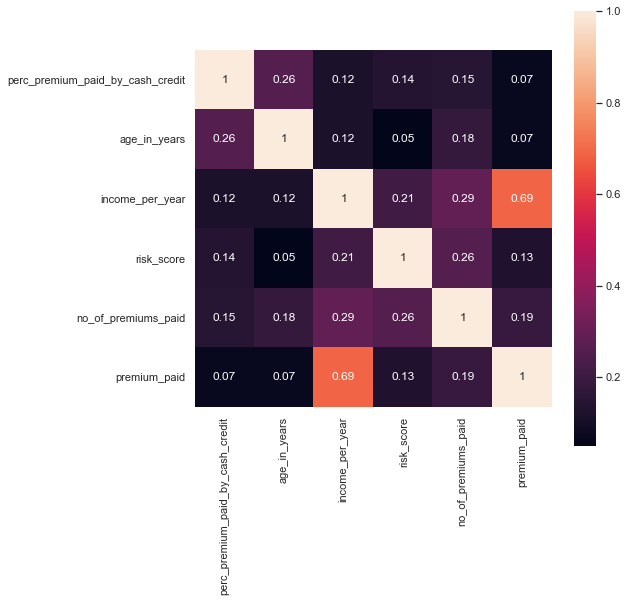

In [21]:
corr = df[numericals].corr().abs() # Taking absolutes, as type of correlation is not necessary for our use case
corr = np.around(corr,decimals=2) # Rounding off to 2 decimal places
sns.set(font_scale=1)
plt.figure(figsize=(8,8))
sns.heatmap(corr,annot=True,square=True)
plt.show()

Fortunately, everything looks good. It can be noted that while the correlation between `premium` and `income_per_year` have moderate association, they are not high **(0.8 or greater)**.

Thus, no removals are required.

Aside from plotting histograms, scatter plots and correlation matrix, boxplots can also be used to determine if there are any outliers.

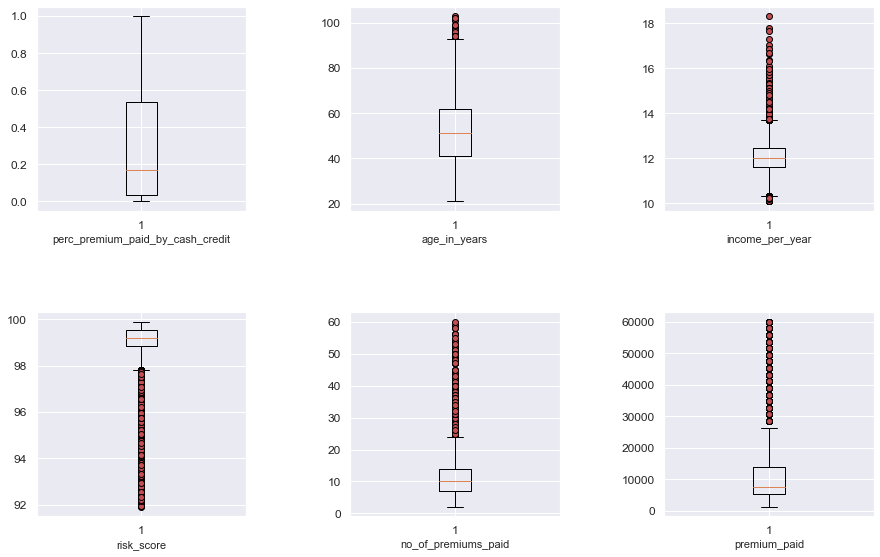

In [22]:
fig = plt.figure(figsize=(15,15))
fig.subplots_adjust(hspace=0.5,wspace=0.5)
k = 1
n = len(numericals)
for i in range(0,n):
    ax = fig.add_subplot(3,3,k)
    ax.xaxis.label.set_size(11)
    ax.yaxis.label.set_size(11)
    ax.xaxis.set_tick_params(labelsize=12)
    ax.yaxis.set_tick_params(labelsize=12)
    ax.boxplot(df[numericals[i]],flierprops=dict(markerfacecolor='r',marker='o'))
    plt.xlabel(numericals[i])
    k = k + 1
plt.show()

It can be observed that `age_in_days`, `income_per_year`, `risk_score`, `no_of_premiums_paid` and `premium` have outliers. These outliers will negatively impact the report's accuracy. However, since the number of outliers are high and there is no way to replace them, they will be kept as they are while making a mental note on these numerical variables.

## Categorical Variable Analysis
An overview of all categorical variables' value distributions are as shown for all **79,853 clients**.

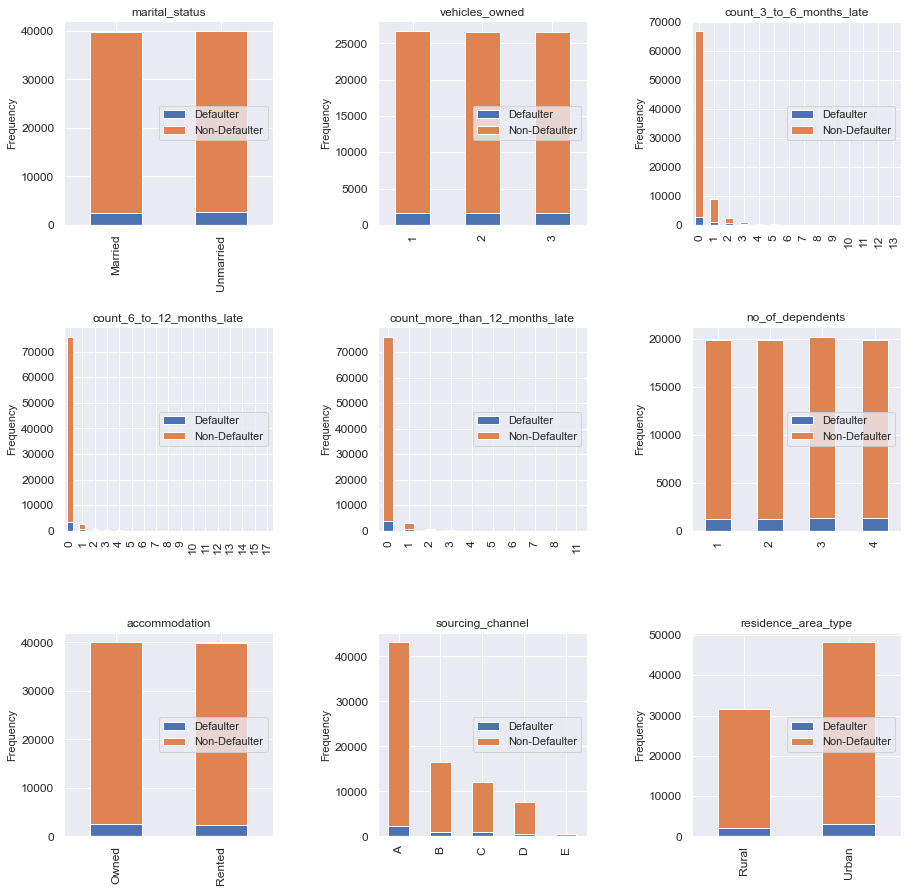

In [23]:
fig = plt.figure(figsize=(15,15))
fig.subplots_adjust(hspace=0.5, wspace=0.5)
k = 1

for i in categoricals:
    
    ax = fig.add_subplot(3,3,k)
    ax.yaxis.label.set_size(11)
    ax.xaxis.label.set_size(11)
    ax.xaxis.set_tick_params(labelsize=12)
    ax.yaxis.set_tick_params(labelsize=12)
    sdf = df.loc[:,[i,'default']]
    ct = pd.crosstab(sdf[i],sdf['default'])
    ct.plot.bar(stacked=True,ax=ax)
    ax.legend(loc='center right')
    plt.ylabel("Frequency")
    plt.xlabel("")
    plt.title(i)
    k = k + 1

plt.show()

The overview clearly shows that **Defaulters** are a minority. However, not much detail is provided per attribute and their elements for comparison.

Thus, we will now do a more detailed univariate analysis on **Defaulters** and their 9 categorical variables.

In [24]:
# Setting defaulter df
df_copy1 = df.copy()
is_defaulter =  df_copy1['default'] == 'Defaulter'
df_defaulter = df_copy1[is_defaulter]
#df_defaulter.head()

# Setting non-defaulter df
is_not_defaulter = df_copy1['default'] == 'Non-Defaulter'
df_not_defaulter = df_copy1[is_not_defaulter]
#df_not_defaulter.head()

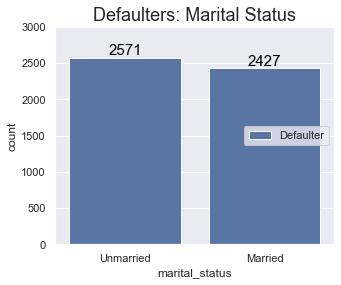

In [25]:
plt.figure(figsize=(5,4))
plt.title("Defaulters: Marital Status",size=18)
marital_status_countplot = sns.countplot(x='marital_status',hue='default',data=df_defaulter)

# Rounding the integer to the 300th value plus an offset of 300
def roundup(x):
    return 300 + int(math.ceil(x / 300.0)) * 300

# Get current axis on current figure
ax = plt.gca()

# Y-limits max value to be set
y_max = df_defaulter['marital_status'].value_counts().max() 
ax.set_ylim([0,roundup(y_max)])

# Adjust legend position to center right so that it does not obstruct data labels
plt.legend(loc='center right')

# Iterate through the list of axes' patches
for p in ax.patches:
    ax.text(p.get_x() + p.get_width()/2., p.get_height(), '%d' % int(p.get_height()), 
            fontsize=15, color='black', ha='center', va='bottom')

In [26]:
df_defaulter.groupby(['marital_status']).size().sort_index(ascending=False)

marital_status
Unmarried    2571
Married      2427
dtype: int64

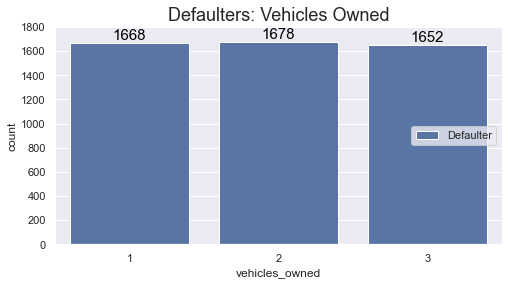

In [27]:
plt.figure(figsize=(8,4))
plt.title("Defaulters: Vehicles Owned",size=18)
vehicles_owned_countplot = sns.countplot(x='vehicles_owned',hue='default',data=df_defaulter)

# Rounding the integer to the next hundredth value plus an offset of 100
def roundup(x):
    return 100 + int(math.ceil(x / 100.0)) * 100

# Get current axis on current figure
ax = plt.gca()

# Y-limits max value to be set
y_max = df_defaulter['vehicles_owned'].value_counts().max() 
ax.set_ylim([0, roundup(y_max)])

# Adjust legend position to center right so that it does not obstruct data labels
plt.legend(loc='center right')

# Iterate through the list of axes' patches
for p in ax.patches:
    ax.text(p.get_x() + p.get_width()/2., p.get_height(), '%d' % int(p.get_height()), 
            fontsize=15, color='black', ha='center', va='bottom')

In [28]:
df_defaulter.groupby(['vehicles_owned']).size().sort_index(ascending=False)

vehicles_owned
3    1652
2    1678
1    1668
dtype: int64

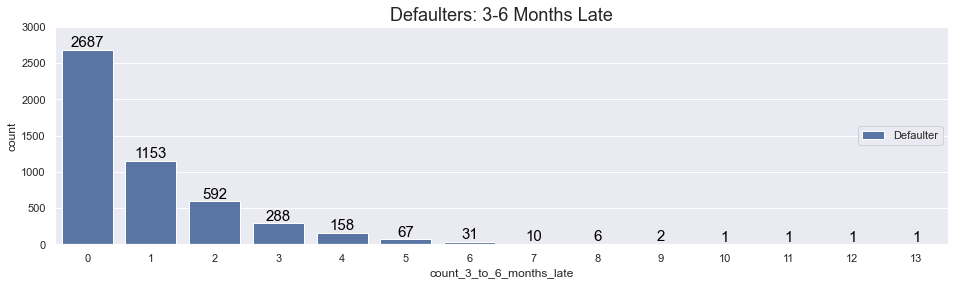

In [29]:
plt.figure(figsize=(16,4))
plt.title("Defaulters: 3-6 Months Late", size=18)
count_3_to_6_months_late_countplot = sns.countplot(x='count_3_to_6_months_late', hue='default', data=df_defaulter)

# Rounding the integer to the next 300th value plus an offset of 300
def roundup(x):
    return 300 + int(math.ceil(x / 300.0)) * 300

# Get current axis on current figure
ax = plt.gca()

# Y-limits max value to be set
y_max = df_defaulter['count_3_to_6_months_late'].value_counts().max() 
ax.set_ylim([0, roundup(y_max)])

# Adjust legend position to center right so that it does not obstruct data labels
plt.legend(loc='center right')

# Iterate through the list of axes' patches
for p in ax.patches:
    height = np.nan_to_num(p.get_height(),0)
    width = np.nan_to_num(p.get_width(),0)
    ax.text(p.get_x() + width/2., height, '%d' % int(height), 
            fontsize=15, color='black', ha='center', va='bottom')

In [30]:
df_defaulter.groupby(['count_3_to_6_months_late']).size().sort_index(ascending=False)

count_3_to_6_months_late
13       1
12       1
11       1
10       1
9        2
8        6
7       10
6       31
5       67
4      158
3      288
2      592
1     1153
0     2687
dtype: int64

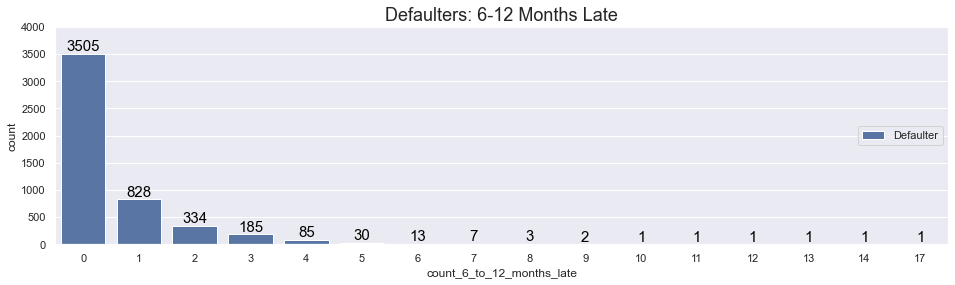

In [31]:
plt.figure(figsize=(16,4))
plt.title("Defaulters: 6-12 Months Late", size=18)
count_6_to_12_months_late_countplot = sns.countplot(x='count_6_to_12_months_late', hue='default', data=df_defaulter)

# Rounding the integer to the next 400th value plus an offset of 400
def roundup(x):
    return 400 + int(math.ceil(x / 400.0)) * 400

# Get current axis on current figure
ax = plt.gca()

# Y-limits max value to be set
y_max = df_defaulter['count_6_to_12_months_late'].value_counts().max() 
ax.set_ylim([0, roundup(y_max)])

# Adjust legend position to center right so that it does not obstruct data labels
plt.legend(loc='center right')

# Iterate through the list of axes' patches
for p in ax.patches:
    height = np.nan_to_num(p.get_height(),0)
    width = np.nan_to_num(p.get_width(),0)
    ax.text(p.get_x() + width/2., height, '%d' % int(height), 
            fontsize=15, color='black', ha='center', va='bottom')

In [32]:
df_defaulter.groupby(['count_6_to_12_months_late']).size().sort_index(ascending=False)

count_6_to_12_months_late
17       1
14       1
13       1
12       1
11       1
10       1
9        2
8        3
7        7
6       13
5       30
4       85
3      185
2      334
1      828
0     3505
dtype: int64

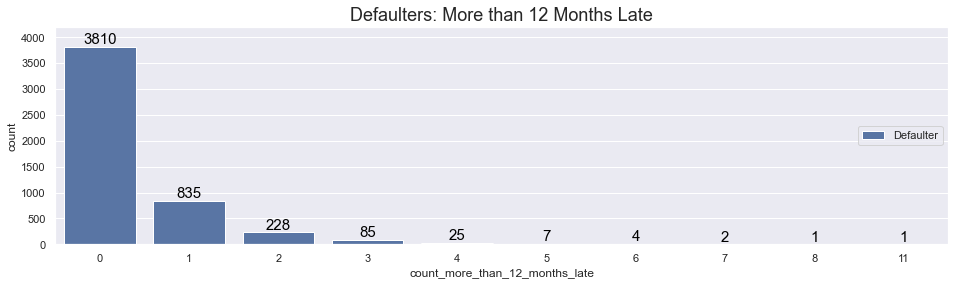

In [33]:
plt.figure(figsize=(16,4))
plt.title("Defaulters: More than 12 Months Late", size=18)
count_more_than_12_months_late_countplot = sns.countplot(x='count_more_than_12_months_late', hue='default', data=df_defaulter)

# Rounding the integer to the next 300th value plus an offset of 300
def roundup(x):
    return 300 + int(math.ceil(x / 300.0)) * 300

# Get current axis on current figure
ax = plt.gca()

# Y-limits max value to be set
y_max = df_defaulter['count_more_than_12_months_late'].value_counts().max() 
ax.set_ylim([0, roundup(y_max)])

# Adjust legend position to center right so that it does not obstruct data labels
plt.legend(loc='center right')

# Iterate through the list of axes' patches
for p in ax.patches:
    height = np.nan_to_num(p.get_height(),0)
    width = np.nan_to_num(p.get_width(),0)
    ax.text(p.get_x() + width/2., height, '%d' % int(height), 
            fontsize=15, color='black', ha='center', va='bottom')

In [34]:
df_defaulter.groupby(['count_more_than_12_months_late']).size().sort_index(ascending=False)

count_more_than_12_months_late
11       1
8        1
7        2
6        4
5        7
4       25
3       85
2      228
1      835
0     3810
dtype: int64

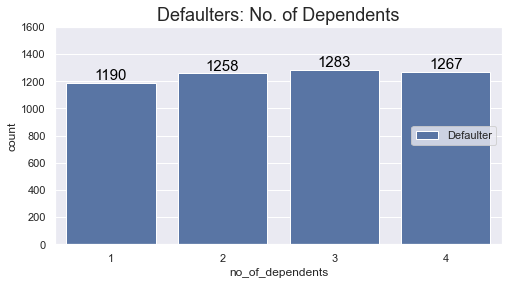

In [35]:
plt.figure(figsize=(8,4))
plt.title("Defaulters: No. of Dependents", size=18)
no_of_dependents_countplot = sns.countplot(x='no_of_dependents', hue='default', data=df_defaulter)

# Rounding the integer to the next 200th value plus an offset of 200
def roundup(x):
    return 200 + int(math.ceil(x / 200.0)) * 200

# Get current axis on current figure
ax = plt.gca()

# Y-limits max value to be set
y_max = df_defaulter['no_of_dependents'].value_counts().max() 
ax.set_ylim([0, roundup(y_max)])

# Adjust legend position to center right so that it does not obstruct data labels
plt.legend(loc='center right')

# Iterate through the list of axes' patches
for p in ax.patches:
    height = np.nan_to_num(p.get_height(),0)
    width = np.nan_to_num(p.get_width(),0)
    ax.text(p.get_x() + width/2., height, '%d' % int(height), 
            fontsize=15, color='black', ha='center', va='bottom')

In [36]:
df_defaulter.groupby(['no_of_dependents']).size().sort_index(ascending=False)

no_of_dependents
4    1267
3    1283
2    1258
1    1190
dtype: int64

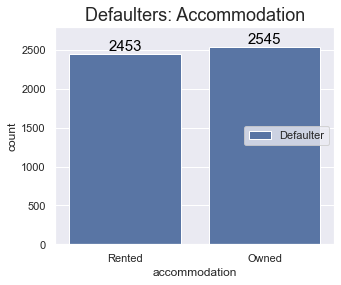

In [37]:
plt.figure(figsize=(5,4))
plt.title("Defaulters: Accommodation", size=18)
accommodation_countplot = sns.countplot(x='accommodation', hue='default', data=df_defaulter)

# Rounding the integer to the next 200th value plus an offset of 200
def roundup(x):
    return 200 + int(math.ceil(x / 200.0)) * 200

# Get current axis on current figure
ax = plt.gca()

# Y-limits max value to be set
y_max = df_defaulter['accommodation'].value_counts().max() 
ax.set_ylim([0, roundup(y_max)])

# Adjust legend position to center right so that it does not obstruct data labels
plt.legend(loc='center right')

# Iterate through the list of axes' patches
for p in ax.patches:
    height = np.nan_to_num(p.get_height(),0)
    width = np.nan_to_num(p.get_width(),0)
    ax.text(p.get_x() + width/2., height, '%d' % int(height), 
            fontsize=15, color='black', ha='center', va='bottom')

In [38]:
df_defaulter.groupby(['accommodation']).size().sort_index(ascending=False)

accommodation
Rented    2453
Owned     2545
dtype: int64

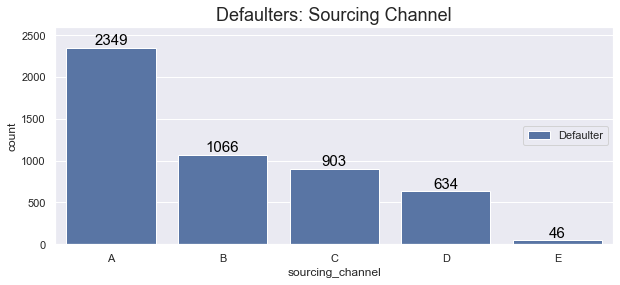

In [39]:
plt.figure(figsize=(10,4))
plt.title("Defaulters: Sourcing Channel", size=18)
sourcing_channel_countplot = sns.countplot(x='sourcing_channel', hue='default', data=df_defaulter)

# Rounding the integer to the next 200th value plus an offset of 200
def roundup(x):
    return 200 + int(math.ceil(x / 200.0)) * 200

# Get current axis on current figure
ax = plt.gca()

# Y-limits max value to be set
y_max = df_defaulter['sourcing_channel'].value_counts().max() 
ax.set_ylim([0, roundup(y_max)])

# Adjust legend position to center right so that it does not obstruct data labels
plt.legend(loc='center right')

# Iterate through the list of axes' patches
for p in ax.patches:
    height = np.nan_to_num(p.get_height(),0)
    width = np.nan_to_num(p.get_width(),0)
    ax.text(p.get_x() + width/2., height, '%d' % int(height), 
            fontsize=15, color='black', ha='center', va='bottom')

In [40]:
df_defaulter.groupby(['sourcing_channel']).size().sort_index(ascending=False)

sourcing_channel
E      46
D     634
C     903
B    1066
A    2349
dtype: int64

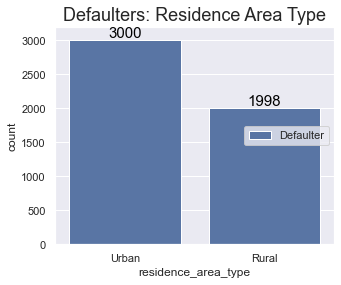

In [41]:
plt.figure(figsize=(5,4))
plt.title("Defaulters: Residence Area Type", size=18)
residence_area_type_countplot = sns.countplot(x='residence_area_type', hue='default', data=df_defaulter)

# Rounding the integer to the next 200th value plus an offset of 200
def roundup(x):
    return 200 + int(math.ceil(x / 200.0)) * 200

# Get current axis on current figure
ax = plt.gca()

# Y-limits max value to be set
y_max = df_defaulter['residence_area_type'].value_counts().max() 
ax.set_ylim([0, roundup(y_max)])

# Adjust legend position to center right so that it does not obstruct data labels
plt.legend(loc='center right')

# Iterate through the list of axes' patches
for p in ax.patches:
    height = np.nan_to_num(p.get_height(),0)
    width = np.nan_to_num(p.get_width(),0)
    ax.text(p.get_x() + width/2., height, '%d' % int(height), 
            fontsize=15, color='black', ha='center', va='bottom')

In [42]:
df_defaulter.groupby(['residence_area_type']).size().sort_index(ascending=False)

residence_area_type
Urban    3000
Rural    1998
dtype: int64

From the univariate analysis of the categorical variables, it can be noted that some values seldomly appear. These values are outliers and may negatively impact the models that the report intends to build later.

In addition, with the given data, the categorical variables cannot be just fed into the system. To address this, the best approach to take would be to utilize **One-Hot Encoding** while removing each of the first dummy variable for each of the categorical variable. Doing so helps to solve the multicollinearity problem in predictors.

While **scikit learn Decision Trees** natively support continuous data, they do not natively support categorical data. Thus, in order to use categorical data with **scikit learn Decision Trees**, we have to use **One-Hot Encoding** to convert a column of categorical data into multiple columns of binary values.

In [43]:
source_df = df.copy() # Save the source data set

# Use get_dummies to transform categorical variables to dummy variables
# Use drop_first as True to remove each first dummy variable for each of the categorical variable
# If drop_first is not used, it will return a redundant feature
# Meaning to say, if the first column is not dropped, the dummy variables will be correlated which is not good
# Because this may affect some models adversely and the effect is stronger when the cardinality is smaller
# where cardinality = the number of elements in a set
# For example, iterative models may have trouble converging and lists of variable importances may be distorted

df = pd.get_dummies(data=df, columns=categoricals, drop_first=True)
df.head(5)

,perc_premium_paid_by_cash_credit,age_in_years,income_per_year,risk_score,no_of_premiums_paid,premium_paid,default,marital_status_Unmarried,vehicles_owned_2,vehicles_owned_3,...,count_more_than_12_months_late_11,no_of_dependents_2,no_of_dependents_3,no_of_dependents_4,accommodation_Rented,sourcing_channel_B,sourcing_channel_C,sourcing_channel_D,sourcing_channel_E,residence_area_type_Urban
id,,,,,,,,,,,,,,,,,,,,,
1,0.32,31.00,11.41,98.81,8,5400,Non-Defaulter,1,0,1,...,0,0,1,0,0,0,0,0,0,0
2,0.00,83.00,11.96,99.07,3,11700,Non-Defaulter,0,0,1,...,0,0,0,0,0,0,0,0,0,1
3,0.01,44.00,11.88,99.17,14,18000,Non-Defaulter,1,0,0,...,0,0,0,0,0,0,1,0,0,1
4,0.00,65.00,12.14,99.37,13,13800,Non-Defaulter,0,0,0,...,0,0,0,0,1,0,0,0,0,1
5,0.89,53.00,11.54,98.80,15,7500,Defaulter,1,1,0,...,0,0,0,0,1,0,0,0,0,1


## Target Variable Analysis
An overview of the target variable's class distribution are as shown for all **79,853 clients**.

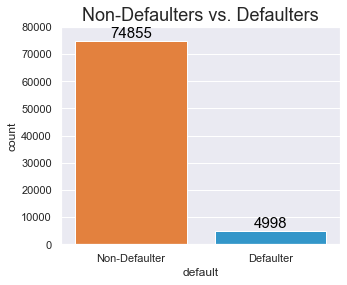

In [44]:
plt.figure(figsize=(5,4))
plt.title("Non-Defaulters vs. Defaulters", size=18)
default_countplot = sns.countplot(x='default', data=df, palette = ['#FF7C22','#1A9EE2'])

# Set plotting style
#sns.set_style('whitegrid')

# Rounding the integer to the next 5000th value plus an offset of 5000
def roundup(x):
    return 5000 + int(math.ceil(x / 5000.0)) * 5000

# Get current axis on current figure
ax = plt.gca()

# Y-limits max value to be set
y_max = df['default'].value_counts().max() 
ax.set_ylim([0, roundup(y_max)])

# Iterate through the list of axes' patches
for p in ax.patches:
    height = np.nan_to_num(p.get_height(),0)
    width = np.nan_to_num(p.get_width(),0)
    ax.text(p.get_x() + width/2., height, '%d' % int(height), 
            fontsize=15, color='black', ha='center', va='bottom')

In [45]:
#df.groupby('default')['default'].agg('count')
df.groupby(['default']).size().sort_index(ascending=False)

default
Non-Defaulter    74855
Defaulter         4998
dtype: int64

In [46]:
100*df['default'].value_counts()/np.sum(df['default'].value_counts())

Non-Defaulter   93.74
Defaulter        6.26
Name: default, dtype: float64

As shown from the **'Non-Defaulters vs. Defaulters'** plot, **Non-Defaulters** are taking up the majority by a large difference.

The interpretation of this is that most of these clients in the dataset do pay their premiums.

However, since the class distribution of the target variable is too dominating for **Non-Defaulter**, some data balancing will be required before the data is fed into the machine learning models.

This imbalance between the two classes is very bad. Our results will be biased towards **Non-Defaulter** and it will be predicted better than **Defaulter**.

Even if we use the naive model, which will always predict the client as **Non-Defaulter**, we will get a **93.74%** accuracy. These results and conclusions are therefore incorrect.

To solve this, we will try to balance the sample data. There are many methods to solve this problem.

For our case, we will take all examples labelled **Defaulter** and randomly select all the examples labelled **Non-Defaulter** in the same quantity. Doing so balances the data with equal counts.

In [47]:
df_default = df.loc[df.default == 'Defaulter',:]
df_no_default = df.loc[df.default == 'Non-Defaulter',:]

random.seed(0)

rebalance = random.sample(range(len(df_no_default.index)), len(df_default.index))
df_no_default = df_no_default.iloc[rebalance,:]

df_balanced = pd.concat([df_default, df_no_default])
df_balanced.head()

,perc_premium_paid_by_cash_credit,age_in_years,income_per_year,risk_score,no_of_premiums_paid,premium_paid,default,marital_status_Unmarried,vehicles_owned_2,vehicles_owned_3,...,count_more_than_12_months_late_11,no_of_dependents_2,no_of_dependents_3,no_of_dependents_4,accommodation_Rented,sourcing_channel_B,sourcing_channel_C,sourcing_channel_D,sourcing_channel_E,residence_area_type_Urban
id,,,,,,,,,,,,,,,,,,,,,
5,0.89,53.00,11.54,98.80,15,7500,Defaulter,1,1,0,...,0,0,0,0,1,0,0,0,0,1
90,1.00,44.00,11.81,98.86,6,9600,Defaulter,1,0,1,...,0,1,0,0,0,1,0,0,0,1
102,0.72,46.00,12.20,99.07,4,11700,Defaulter,1,0,1,...,0,1,0,0,1,0,0,0,0,1
133,0.12,29.00,11.78,98.77,8,9600,Defaulter,0,0,0,...,0,0,1,0,1,0,0,0,0,0
139,0.40,41.00,12.26,98.92,13,13800,Defaulter,1,0,1,...,0,0,0,0,1,0,0,0,0,0


We shall now test to see if the frequencies of the two classes of the data set are balanced:

In [48]:
100*df_balanced['default'].value_counts()/np.sum(df_balanced['default'].value_counts())

Non-Defaulter   50.00
Defaulter       50.00
Name: default, dtype: float64

The target variables are now balanced.

**Undersampling** (accounting for all **Defaulters** and randomly picking **Non-Defaulters**) was used instead of oversampling (accounting for all **Non-Defaulters** and replicating **Defaulters**).

The justification for choosing undersampling instead of **over-sampling** was because:

Randomly adding **Defaulters** in the same number as **Non-Defaulters** would mean that the model will be trained in such a way to predict those observations that appear that amount of times. Thus, the model will not be stable for any new information about **Defaulters**.

Now, when we apply **undersampling** we store all **Defaulters** observations in their natural forms. The model is more stable for this class. While it can be argued that we might lose a little bit information about **Non-Defaulter** observations, **undersampling** is still better than trying to add many equal observations for **Non-Defaulters**.

Using **undersampling** will give us a fair accuracy. Using **oversampling** will give us 'fake' results.

### The basic findings for the EDA
Having done our deep analysis, we can now list the main findings for our EDA:

1) The dataset contains information about 79853 policy holders, 16 predictors (15 predictors if we exclude ID) and 1 outcome (response);

2) The dataset does not have any missing values;

3) Some variables are categorical. If the categorical variable has more than 2 values **(in our use case we included 2 values)**, we transform it using one-hot encoding. These variables are:
* `vehicles_owned`
* `count_3_to_6_months_late`
* `count_6_to_12_months_late`
* `count_more_than_12_months_late`
* `no_of_dependents`
* `sourcing_channel`
* `residence_area_type`;


4) For the **79853** policy holders, the number of unmarried individuals is higher than those that are married, the mean income of the customers is about **208,847 USD** per year, the average number of premiums paid is about **10,924 USD** and it is paid in **93.7%** of the cases, the mean age of customers is **51 years**;

5) The categorical values are not balanced too. For example, the number of dependents that a client has in his family. 'A' has **43,134**, but 'E' has only **609**.

6) For the **4998 Defaulters**, based on their mean, they mostly pay their premiums in cash, are in their 40s, earn lesser than **Non-Defaulters**, have a lower risk score and paid lesser premiums in totality. They also tend to be unmarried, live in urban areas and largely use sourcing channel A.



Thus, the data is complicated, complete and ready for classification.

## Data Splitting
Now that we have balanced the classes, we can split the predictors and response.

In [49]:
# We will use the df_balanced from our Target Analysis
df_balanced = pd.concat([df_default, df_no_default])
X = df_balanced.drop(['default'], axis=1)
y = df_balanced['default']

In order to test our models and let them learn from the data set, we will have to split the predictors and target into 2; **training** and **testing** data sets. The test part will be used as an independent data to determine the results independently.

In [50]:
# To automatically split data
from sklearn.model_selection import train_test_split

# Random state is used to recreate same splitting. The test data set will be 30% of the source data set
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)

we will scale our predictors with mean = 0, and standard deviation = 1.

In [51]:
from sklearn import preprocessing
mm_scaler = preprocessing.StandardScaler()
X_train_fit = mm_scaler.fit(X_train)
X_train = X_train_fit.transform(X_train)
X_test = X_train_fit.transform(X_test)

## Balancing the Testing and Training data sets
We shall now check and confirm that our test and train data sets' classes are still balanced after splitting.

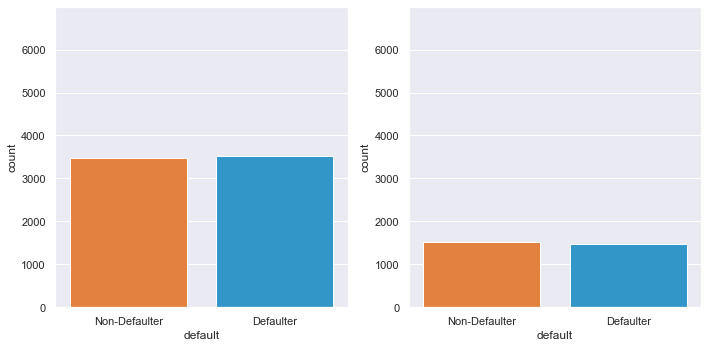

In [52]:
fig, axes = plt.subplots(1, 2,figsize=(10,5))
sns.countplot(x=y_train, ax=axes[0], palette = ['#FF7C22','#1A9EE2'])
sns.countplot(x=y_test, ax=axes[1], palette = ['#FF7C22','#1A9EE2'])
n=y_train.shape[0]
axes[0].set_ylim(0, n) # To maintain same scale; easy to compare
axes[1].set_ylim(0, n) # Bringing both plots to same scale
fig.tight_layout()

plt.show()

As evidently shown, the class distributions are the same within both Test and Train splits.

# Model Building, Comparisons and Interpretations
Now that we have completed our EDA analysis, deep-dived into insights/assumptions, and balanced our data, we can now build our models.

We will build, train and test 3 models. Then, we will compare them and form interpretations about their reliability in making predictions for our use case.

The 3 models that we will be looking into will be:

1. Decision Tree Model
2. Random Forest Model
3. Logistic Regression Model

To start, let's have a look at Decision Tree Models.

## Decision / Classification Trees

**Decision Trees** are an exceptionally useful machine learning method when we need to to know how the decisions are being made. For example, if we have to justify the predictions to senior management, **Decision Trees** are a good supervised learning method because each step in the decision making process is easy to understand.

*Note: Image is for reference only. It is not related to our Decision Tree's output.*
<img src="tree.png" alt="A Classification Tree" style="width: 600px;">


**Decision Trees** are a flowchart-like tree structure where an internal node represents feature (or attribute), the branch represents a decision rule, and each leaf node represents the outcome. The top-most node in a decision tree is known as the root node. It learns to partition on the basis of the attribute value. It partitions the tree in a recursive manner, therefore called recursive partitioning. This flowchart-like structure helps us in decision making.

**Decision Trees** are a white box type of ML algorithm. They share an internal decision-making logic, which is not available in the black box type of algorithms such as Neural Network. Its training time is faster compared to the neural network algorithm. The time complexity of **Decision Trees** are a function of the number of records and number of attributes in the given data. **Decision Trees** are a distribution-free or non-parametric method, which does not depend upon probability distribution assumptions. **Decision Trees** can handle high dimensional data with good accuracy.

The **Decision Tree** is a good choice for binary classification and it is thus acceptable for our use case.

To begin, let's start creating our Decision Tree Model:

In [53]:
# Create the decision tree model
m1 = DecisionTreeClassifier(random_state=0).fit(X_train, y_train)

And then measure its performance.

In [54]:
# Predict the response for test dataset
y_pred1 = m1.predict(X_test)

# Predict the response for train dataset, we will use this for model evaluation
y_train_pred1 = m1.predict(X_train)
ac1=metrics.accuracy_score(y_test, y_pred1)
ac_train1=metrics.accuracy_score(y_train_pred1, y_train)
print("Train Accuracy:",ac_train1)
print("Test Accuracy:",ac1)

Train Accuracy: 1.0
Test Accuracy: 0.6538846282094032


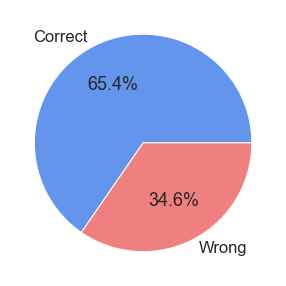

In [55]:
sns.set(font_scale = 1.5)
plt.figure(figsize=(5,5))
plt.pie([ac1, 1-ac1], labels=['Correct', 'Wrong'], autopct='%1.1f%%', colors = ['cornflowerblue','lightcoral'])
plt.show()

Here, we can see that the model's accuracy is at 65.4%. The perecentage is not that high, but we can still use this result as the baseline against other models to compare with.

## Confusion Matrix for Decision Tree
The confusion matrix helps us to better understand the obtained results.

To note, the array values' results are to be interpreted in this order: - True 1, False 1, True 0, False 0

### Training Dataset for Decision Tree

In [56]:
c_matrix = metrics.confusion_matrix(y_train, y_train_pred1)
c_matrix

array([[3518,    0],
       [   0, 3479]], dtype=int64)

### Testing Dataset for Decision Tree

In [57]:
c_matrix = metrics.confusion_matrix(y_test, y_pred1)
c_matrix

array([[ 953,  527],
       [ 511, 1008]], dtype=int64)

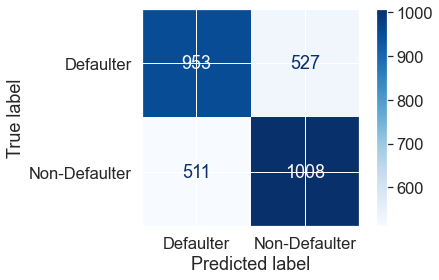

In [58]:
# Diagonals are correct predictions
plot_confusion_matrix(m1, X_test, y_test, display_labels=["Defaulter", "Non-Defaulter"], cmap = 'Blues')


From here, we can see that true predictions are in the majority, which is all right.

## Full Classification Report for Decision Tree
The full classification report helps us to understand the precision, recall and f-1 score.

### Training Dataset for Decision Tree

In [59]:
target_names = ['Defaulter', 'Non-Defaulter']
print(metrics.classification_report(y_train, y_train_pred1, target_names=target_names))

               precision    recall  f1-score   support

    Defaulter       1.00      1.00      1.00      3518
Non-Defaulter       1.00      1.00      1.00      3479

     accuracy                           1.00      6997
    macro avg       1.00      1.00      1.00      6997
 weighted avg       1.00      1.00      1.00      6997



### Testing Dataset for Decision Tree

In [60]:
target_names = ['Defaulter', 'Non-Defaulter']
print(metrics.classification_report(y_test, y_pred1, target_names=target_names))

               precision    recall  f1-score   support

    Defaulter       0.65      0.64      0.65      1480
Non-Defaulter       0.66      0.66      0.66      1519

     accuracy                           0.65      2999
    macro avg       0.65      0.65      0.65      2999
 weighted avg       0.65      0.65      0.65      2999



In the confusion matrix, we see that of the **953 + 527 = 1480** clients that are **Defaulters**, **953 (64%)** were correctly classified. And of the **511 + 1008 = 1519** clients that are **Non-Defaulters**, **1008 (66%)** were correctly classified. Can we do better? One thing that might be holding this **Decision Tree** back is that it may have **overfit** the training dataset. So let's prune the tree. Pruning, in theory, should solve the overfitting problem and give us better results.

## Cost Complexity Pruning Part 1: Visualize alpha

**Decision Trees** are notorious for being **overfit** to the **Training Dataset**, and there are a lot of parameters, like `max_depth` and `min_samples`, that are designed to reduce overfitting. However, pruning a tree with **cost complexity pruning** can simplify the whole process of finding a smaller tree that impoves the accuracy with the **Testing Dataset**.

Pruning a decision tree is all about finding the right value for the pruning parameter, `alpha`, which controls how little or how much pruning happens. One way to find the optimal value for `alpha` is to plot the accuracy of the tree as a function of different values.  We'll do this for both the **Training Dataset** and the **Testing Dataset**.

First, let's extract the different values of `alpha` that are available for this tree and build a pruned tree for each value for `alpha`. **NOTE:** We omit the maximum value for alpha with `ccp_alphas = ccp_alphas[:-1]` because it would prune all leaves, leaving us with only a root instead of a tree.

In [61]:
path = m1.cost_complexity_pruning_path(X_train, y_train) # Determine values for alpha
ccp_alphas = path.ccp_alphas # Extract different values for alpha
ccp_alphas = ccp_alphas[:-1] # Exclude the maximum value for alpha

m1s = [] # Create an array that we will put decision trees into

# Now create one decision tree per value for alpha and store it in the array
for ccp_alpha in ccp_alphas:
    m1 = DecisionTreeClassifier(random_state=0, ccp_alpha=ccp_alpha)
    m1.fit(X_train, y_train)
    m1s.append(m1)

Now let's graph the accuracy of the trees using the **Training Dataset** and the **Testing Dataset** as a function of alpha.

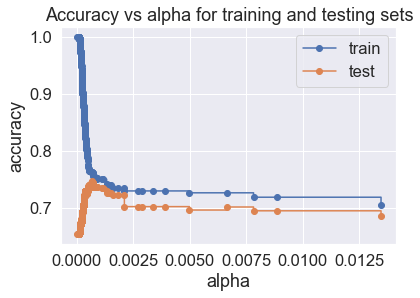

In [62]:
train_scores = [m1.score(X_train, y_train) for m1 in m1s]
test_scores = [m1.score(X_test, y_test) for m1 in m1s]

fig, ax = plt.subplots()
ax.set_xlabel("alpha")
ax.set_ylabel("accuracy")
ax.set_title("Accuracy vs alpha for training and testing sets")
ax.plot(ccp_alphas, train_scores, marker='o', label="train", drawstyle="steps-post")
ax.plot(ccp_alphas, test_scores, marker='o', label="test", drawstyle="steps-post")
ax.legend()
plt.show()

In the graph above, we see that the accuracy for the **Testing Dataset** hits its maximum value when `alpha` is about **0.0015**. After this value for `alpha`, the accuracy of the **Training Dataset** drops off and that suggests we should set `ccp_alpha=0.0015`.

**NOTE:** When we apply **Cost Complexity Pruning** to a **Classification Tree**, values for `alpha` go from 0 to 1, because GINI scores go from 0 to 1. In contrast, values for `alpha` for a **Regression Tree** can be much larger since the sum of squared residuals can, in theory, go from 0 to positive infinity.

Since there are many ways we could have divided the original dataset into **Training** and **Testing** datasets, how do we know we used the best **Training Dataset** and how do we know we used the best **Testing Dataset**? Typically, we answer this question with **10-Fold Cross Validation**. So that's what we're going to do now, and we'll do it with the `cross_val_score()` function.

## Cost Complexity Pruning Part 2: Cross Validation For Finding the Best Alpha

The graph we just drew suggested one value for alpha, **0.0015**, but another
set of data might suggest another optimal value. 

First, let's demonstrate that different training and testing datasets result in trees with different accuracies when we set `ccp_alpha=0.0015`. We will do this by using the `cross_val_score()` function to generate different training and testing datasets and then train and test the tree with those datasets.

<AxesSubplot:xlabel='tree'>

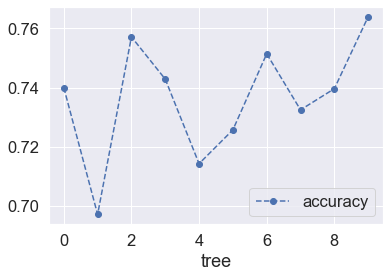

In [63]:
m1 = DecisionTreeClassifier(random_state=42, ccp_alpha=0.0015) # Create the tree with ccp_alpha=0.0016

# Now use 5-fold cross validation create 5 different training and testing datasets that
# are then used to train and test the tree.
scores = cross_val_score(m1, X_train, y_train, cv=10) 
m1_df = pd.DataFrame(data={'tree': range(10), 'accuracy': scores})

m1_df.plot(x='tree', y='accuracy', marker='o', linestyle='--')

The graph above shows that using different **Training** and **Testing** data with the same `alpha` resulted in different accuracies, suggesting that `alpha` is sensitive to the datasets. So, instead of picking a single **Training** dataset and single **Testing** dataset, let's use **cross validation** to find the optimal value for `ccp_alpha`.

<AxesSubplot:xlabel='alpha'>

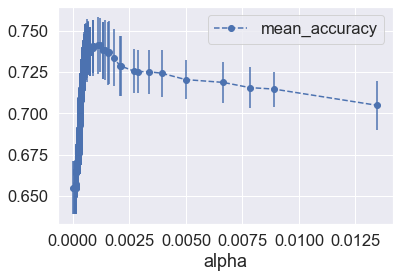

In [64]:
# Create an array to store the results of each fold during cross validiation
alpha_loop_values = []

# For each candidate value for alpha, we will run 10-fold cross validation.
# Then we will store the mean and standard deviation of the scores (the accuracy) for each call
# to cross_val_score in alpha_loop_values
for ccp_alpha in ccp_alphas:
    m1 = DecisionTreeClassifier(random_state=0, ccp_alpha=ccp_alpha)
    scores = cross_val_score(m1, X_train, y_train, cv=10)
    alpha_loop_values.append([ccp_alpha, np.mean(scores), np.std(scores)])

# Now we can draw a graph of the means and standard deviations of the scores
# for each candidate value for alpha
alpha_results = pd.DataFrame(alpha_loop_values, 
                             columns=['alpha', 'mean_accuracy', 'std'])

alpha_results.plot(x='alpha', 
                   y='mean_accuracy', 
                   yerr='std', 
                   marker='o', 
                   linestyle='--')

Using cross validation, we can see that, over all, instead of setting `ccp_alpha=0.0015`,  we need to set it to something closer to **0.0014**. We can find the exact value with:

In [65]:
pd.options.display.float_format = "{:.4f}".format
alpha_results[(alpha_results['alpha'] > 0.0014)
              &
              (alpha_results['alpha'] < 0.0015)]

,alpha,mean_accuracy,std
600,0.0014,0.7385,0.0183


In [66]:
# Return pd format to 2 decimal places
pd.options.display.float_format = "{:.2f}".format

Now let's store the ideal value for alpha so that we can use it to build the best tree.

In [67]:
ideal_ccp_alpha = alpha_results[(alpha_results['alpha'] > 0.0014) 
                                & 
                                (alpha_results['alpha'] < 0.0015)]['alpha']
ideal_ccp_alpha

600   0.00
Name: alpha, dtype: float64

**NOTE:** At this point Python thinks that `ideal_ccp_alpha` is a `series`, which is a type of array. We can tell because when we printed `ideal_ccp_alpha` out, we got two bits of stuff. The first one was `600`, which is the index in the series, the second one, `0.0014`, is the value we want. So we can convert this from a series to a float with the following command:

In [68]:
# Convert ideal_ccp_alpha from a series to a float
ideal_ccp_alpha = float(ideal_ccp_alpha)
ideal_ccp_alpha

0.001418320742785542

Now we have the ideal value for `alpha` and we can build, evaluate and draw the final **Decision Tree**.

## Building, Evaluating, Drawing, and Interpreting the Final Decision Tree

Now that we have the ideal value for `alpha` we can build the final **Decision Tree** by setting `ccp_alpha=ideal_ccp_alpha`:

In [69]:
# Build and train a new decision tree, only this time use the optimal value for alpha
m1_pruned = DecisionTreeClassifier(random_state=42, 
                                       ccp_alpha=ideal_ccp_alpha)
m1_pruned = m1_pruned.fit(X_train, y_train)

And then measure its performance.

In [70]:
# Predict the response for test dataset
y_pred1 = m1_pruned.predict(X_test)

# Predict the response for train dataset, we will use this for model evaluation
y_train_pred1 = m1_pruned.predict(X_train)
ac1=metrics.accuracy_score(y_test, y_pred1)
ac_train1=metrics.accuracy_score(y_train_pred1, y_train)
print("Train Accuracy:",ac_train1)
print("Test Accuracy:",ac1)

Train Accuracy: 0.7411747891953695
Test Accuracy: 0.727242414138046


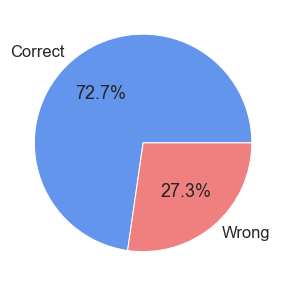

In [71]:
sns.set(font_scale = 1.5)
plt.figure(figsize=(5,5))
plt.pie([ac1, 1-ac1], labels=['Correct', 'Wrong'], autopct='%1.1f%%', colors = ['cornflowerblue','lightcoral'])
plt.show()

Here, we can see that the model's accuracy is at 72.7%. The perecentage is higher than its previous results now.

## Confusion Matrix for Pruned Decision Tree
The confusion matrix helps us to better understand the obtained results.

To note, the array values' results are to be interpreted in this order: - True 1, False 1, True 0, False 0

### Testing Dataset for Pruned Decision Tree
**NOTE:** Training dataset has been excluded this time round since we have pruned the tree.

In [72]:
c_matrix = metrics.confusion_matrix(y_test, y_pred1)
c_matrix

array([[1077,  403],
       [ 415, 1104]], dtype=int64)

Now let's draw another confusion matrix to see if the pruned tree does better.

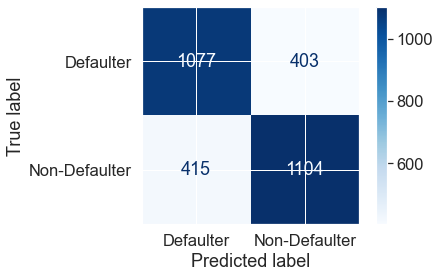

In [73]:
# Diagonals are correct predictions
plot_confusion_matrix(m1_pruned, X_test, y_test, display_labels=["Defaulter", "Non-Defaulter"], cmap = 'Blues')

## Full Classification Report for Decision Tree
The full classification report helps us to understand the precision, recall and f-1 score.

### Testing Dataset for Pruned Decision Tree
**NOTE:** Training dataset has been excluded this time round since we have pruned the tree.

In [74]:
target_names = ['Defaulter', 'Non-Defaulter']
print(metrics.classification_report(y_test, y_pred1, target_names=target_names))

               precision    recall  f1-score   support

    Defaulter       0.72      0.73      0.72      1480
Non-Defaulter       0.73      0.73      0.73      1519

     accuracy                           0.73      2999
    macro avg       0.73      0.73      0.73      2999
 weighted avg       0.73      0.73      0.73      2999



We see that the pruned tree is better at classifying clients than the full sized tree. 

Of the **1077 + 403 = 1480** clients that are **Defaulters**, **1077 (73%)** were correctly classified. This is an improvement over the full sized tree, which only correctly classified **953 (64%)** of the pclients that are **Defaulters**. Of the **415 + 1104 = 1519** clients that are **Non-Defaulters**, **1104 (73%)** were correctly classified. Again, this is an improvement over the full sized tree, which only correctly classified **1008 (66%)** of the clients that are **Non-Defaulters**.

Now that we are done with our **Decision Tree** model, let's work on the next model: **Random Forest**.

## Random Forest Model
The random forest is a model made up of many decision trees. Rather than just simply averaging the prediction of trees (which we could call a **"forest"**), this model uses two key concepts that gives it the name **'random'**:

1. Random sampling of training data points when building trees
2. Random subsets of features considered when splitting nodes

Let's create our Random Forest Model now and evaluate its performance:

In [75]:
# n_estimators set as 500, it is the no. of trees we want to build before taking the maximum voting or averages of predictions
# The more the better, but it makes the code slower
# n_jobs refers to number of processors
# max_depth refers to the longest path between the root node and the leaf node
m2 = RandomForestClassifier(n_estimators=500, random_state=0, n_jobs=2, max_depth=15).fit(X_train, y_train)

# Predict the response for test dataset
y_pred2 = m2.predict(X_test)
# Predict the response for train dataset, we will use this for model evaluation
y_train_pred2 = m2.predict(X_train)
from sklearn import metrics # For error metric
ac2=metrics.accuracy_score(y_test, y_pred2)
ac_train2=metrics.accuracy_score(y_train_pred2, y_train)
print("Train Accuracy:",ac_train2)
print("Test Accuracy:",ac2)

Train Accuracy: 0.8952408174932114
Test Accuracy: 0.7499166388796266


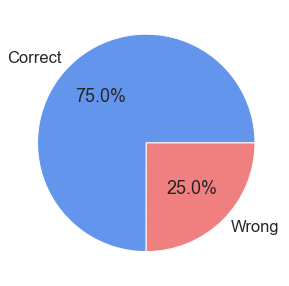

In [76]:
sns.set(font_scale = 1.5)
plt.figure(figsize=(5,5))
plt.pie([ac2, 1-ac2], labels=['Correct', 'Wrong'], autopct='%1.1f%%', colors = ['cornflowerblue','lightcoral'])
plt.show()

From the initial results, we can see that the **Random Forest** Model has returned us **a better accuracy of 75%** as compared to the pruned **Decision Tree** Model **(72.7%)**.

Let's have a look at its other error metrics:

## Confusion Matrix for Random Forest
The confusion matrix helps us to better understand the obtained results.

To note, the array values' results are to be interpreted in this order: - True 1, False 1, True 0, False 0

### Training Dataset for Random Forest

In [77]:
c_matrix = metrics.confusion_matrix(y_train, y_train_pred2)
c_matrix

array([[3017,  501],
       [ 232, 3247]], dtype=int64)

### Testing Dataset for Random Forest

In [78]:
c_matrix = metrics.confusion_matrix(y_test, y_pred2)
c_matrix

array([[1119,  361],
       [ 389, 1130]], dtype=int64)

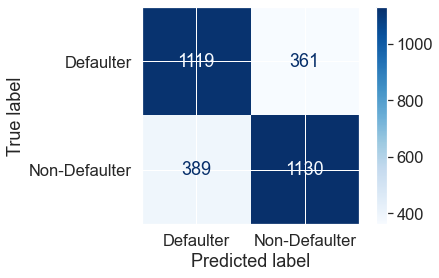

In [79]:
# Diagonals are correct predictions
plot_confusion_matrix(m2, X_test, y_test, display_labels=["Defaulter", "Non-Defaulter"], cmap = 'Blues')


From here, we can see that true predictions are in the majority, which is all right.

In addition, when comparing against the **Decision Tree**, although **Random Forest** has provided us with a poorer confusion matrix for the training dataset **(pruned dt:100% vs rf:89.5%)**, it can be noted that it performed better in the testing dataset **(pruned dt:72.7% vs rf:75%)**.

What this implies is that the **Decision Tree model** is inclined towards overfitting, as we had discussed earlier.

Let's move on to the Full Classification Report.

## Full Classification Report for Random Forest
The full classification report helps us to understand the precision, recall and f-1 score.

### Training Dataset for Random Forest

In [80]:
target_names = ['Defaulter', 'Non-Defaulter']
print(metrics.classification_report(y_train, y_train_pred2, target_names=target_names))

               precision    recall  f1-score   support

    Defaulter       0.93      0.86      0.89      3518
Non-Defaulter       0.87      0.93      0.90      3479

     accuracy                           0.90      6997
    macro avg       0.90      0.90      0.90      6997
 weighted avg       0.90      0.90      0.90      6997



### Testing Dataset for Random Forest

In [81]:
target_names = ['Defaulter', 'Non-Defaulter']
print(metrics.classification_report(y_test, y_pred2, target_names=target_names))

               precision    recall  f1-score   support

    Defaulter       0.74      0.76      0.75      1480
Non-Defaulter       0.76      0.74      0.75      1519

     accuracy                           0.75      2999
    macro avg       0.75      0.75      0.75      2999
 weighted avg       0.75      0.75      0.75      2999



From the results, we can see that all the cases of **Random Forest** are generally slightly better when compared against the pruned **Decision Tree (73% vs 75% respectively)**.

We can conclude that the **Random Forest** Model is generally better than the **Decision Tree** Model, even after **Decision Tree** Model has done its pruning.

Now that we have evaluated the performance of these two models, let us proceed to the third and final model, the **Logistic Regression** Model.


## Logistic Regression Model
**Logistic Regression** is an appropriate regression analysis to use when the dependent variable is dichotomous (binary). Like all regression analyses, **Logistic Regression** is a predictive analysis. **Logistic Regression** is used to both describe data and to explain the relationship between one dependent binary variable and one other or more nominal, ordinal, interval or ratio-level independent variables.

Let's try to get the results based on this model.

In [82]:
m3 = LogisticRegression(random_state=0, solver='lbfgs', C=100, max_iter=600).fit(X_train, y_train)
# Predict the response for test dataset
y_pred3 = m3.predict(X_test)
# Predict the response for train dataset, we will use this for model evaluation
y_train_pred3 = m3.predict(X_train)
ac3=metrics.accuracy_score(y_test, y_pred3)
ac_train3=metrics.accuracy_score(y_train_pred3, y_train)
print("Train Accuracy:",ac_train3)
print("Test Accuracy:",ac3)

Train Accuracy: 0.7628983850221523
Test Accuracy: 0.7482494164721574


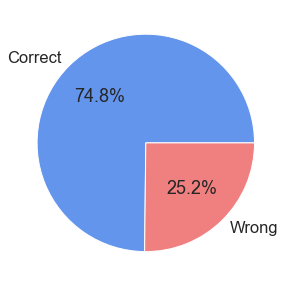

In [83]:
sns.set(font_scale = 1.5)
plt.figure(figsize=(5,5))
plt.pie([ac3, 1-ac3], labels=['Correct', 'Wrong'], autopct='%1.1f%%', colors = ['cornflowerblue','lightcoral'])
plt.show()

Interestingly, the seems to be returning the same result as the **Random Forest** Model (or slightly worse, if we say 0.2% makes all the difference).

Let's have a look at the other metrics to measure the performance.

## Confusion Matrix for Logistic Regression
The confusion matrix helps us to better understand the obtained results.

To note, the array values' results are to be interpreted in this order: - True 1, False 1, True 0, False 0

### Training Dataset for Logistic Regression

In [84]:
c_matrix = metrics.confusion_matrix(y_train, y_train_pred3)
c_matrix

array([[2574,  944],
       [ 715, 2764]], dtype=int64)

### Testing Dataset for Logistic Regression

In [85]:
c_matrix = metrics.confusion_matrix(y_test, y_pred3)
c_matrix

array([[1039,  441],
       [ 314, 1205]], dtype=int64)

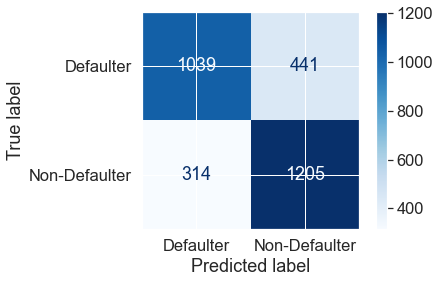

In [86]:
# Diagonals are correct predictions
plot_confusion_matrix(m3, X_test, y_test, display_labels=["Defaulter", "Non-Defaulter"], cmap = 'Blues')


From here, we can see that true predictions are in the majority, which is all right.

## Full Classification Report for Logistic Regression
The full classification report helps us to understand the precision, recall and f-1 score.

### Training Dataset for Logistic Regression

In [87]:
target_names = ['Defaulter', 'Non-Defaulter']
print(metrics.classification_report(y_train, y_train_pred3, target_names=target_names))

               precision    recall  f1-score   support

    Defaulter       0.78      0.73      0.76      3518
Non-Defaulter       0.75      0.79      0.77      3479

     accuracy                           0.76      6997
    macro avg       0.76      0.76      0.76      6997
 weighted avg       0.76      0.76      0.76      6997



### Testing Dataset for Logistic Regression

In [88]:
target_names = ['Defaulter', 'Non-Defaulter']
print(metrics.classification_report(y_test, y_pred3, target_names=target_names))

               precision    recall  f1-score   support

    Defaulter       0.77      0.70      0.73      1480
Non-Defaulter       0.73      0.79      0.76      1519

     accuracy                           0.75      2999
    macro avg       0.75      0.75      0.75      2999
 weighted avg       0.75      0.75      0.75      2999



The results look good. In fact, they seem to be very close to the **Random Forest** Model's results too.

Based on the Full Classification Report, both **Random Forest** and **Logistic Regression** are at 75% accuracy.

The slight differences vary in their precision, recallability and f1-score.

Random Forest seems to be quite consistent for all 3 at 75%. Whereas for Logistic Regression, we can see that it is doing slightly better in precision for identifying **Defaulters**, and slightly better in recallability for **Non-Defaulters**.

**Precision** attempts to answer "What proportion of positive identifications was actually correct?" whereby Precision = TP / (TP + FP)

**Recall** attempts to answer "What proportion of actual positives was identified correctly?" whereby Recall = TP / (TP + FN)


This gives the final f1-score to be 73% and 76% respectively for **Logistic Regression**'s **Defaulters** and **Non-Defaulters**.

## Results Comparison
Now that we have all 3 models, we can compare them amongst one another.

In [89]:
ac_res=pd.DataFrame({'Decision Tree':[ac1],'Random Forest':[ac2],
                     'Logistic Regression':[ac3]})
ac_res.index=['Accuracy for Test Dataset']
ac_res

,Decision Tree,Random Forest,Logistic Regression
Accuracy for Test Dataset,0.73,0.75,0.75


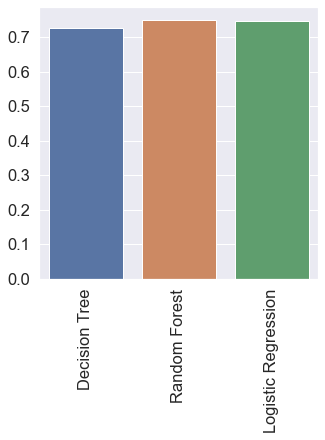

In [90]:
sns.set(font_scale = 1.5)
plt.figure(figsize=(5, 5))
plot = sns.barplot(x=ac_res.columns, y=np.array(ac_res.iloc[0,:]))
plt.setp(plot.get_xticklabels(), rotation=90)
plt.show()

# # Get current axis on current figure
# ax = plt.gca()

# # Y-limits max value to be set
# y_max = ???
# ax.set_ylim([0, roundup(y_max)])

# # Iterate through the list of axes' patches
# for p in ax.patches:
#     height = np.nan_to_num(p.get_height(),0)
#     width = np.nan_to_num(p.get_width(),0)
#     ax.text(p.get_x() + width/2., height, '%d' % int(height), 
#             fontsize=15, color='black', ha='center', va='bottom')

**Logistic Regression** and **Random Forest** seem to be performing at same accuracy, with **Decison Tree** slightly less accurate.


**Random Forest** would be decent to use since it is consistently performing at 75% in all of its cases.

**Logistic Regression** will be good model as well because of its higher precision in identifying **Defaulters** which is more crucial to us than correctly identiying **Non-Defaulters**.

Any of the earlier two mentioned models will be good to use. In fact, for best practice, both models should be used.

## Feature Importance
Both models (**Random Forest** and **Logistic Regression**) may also provide us with some insights about the features that they deem as important.

Let's have a look and try to compare what they see as important features:

### Feature Importance for Random Forest

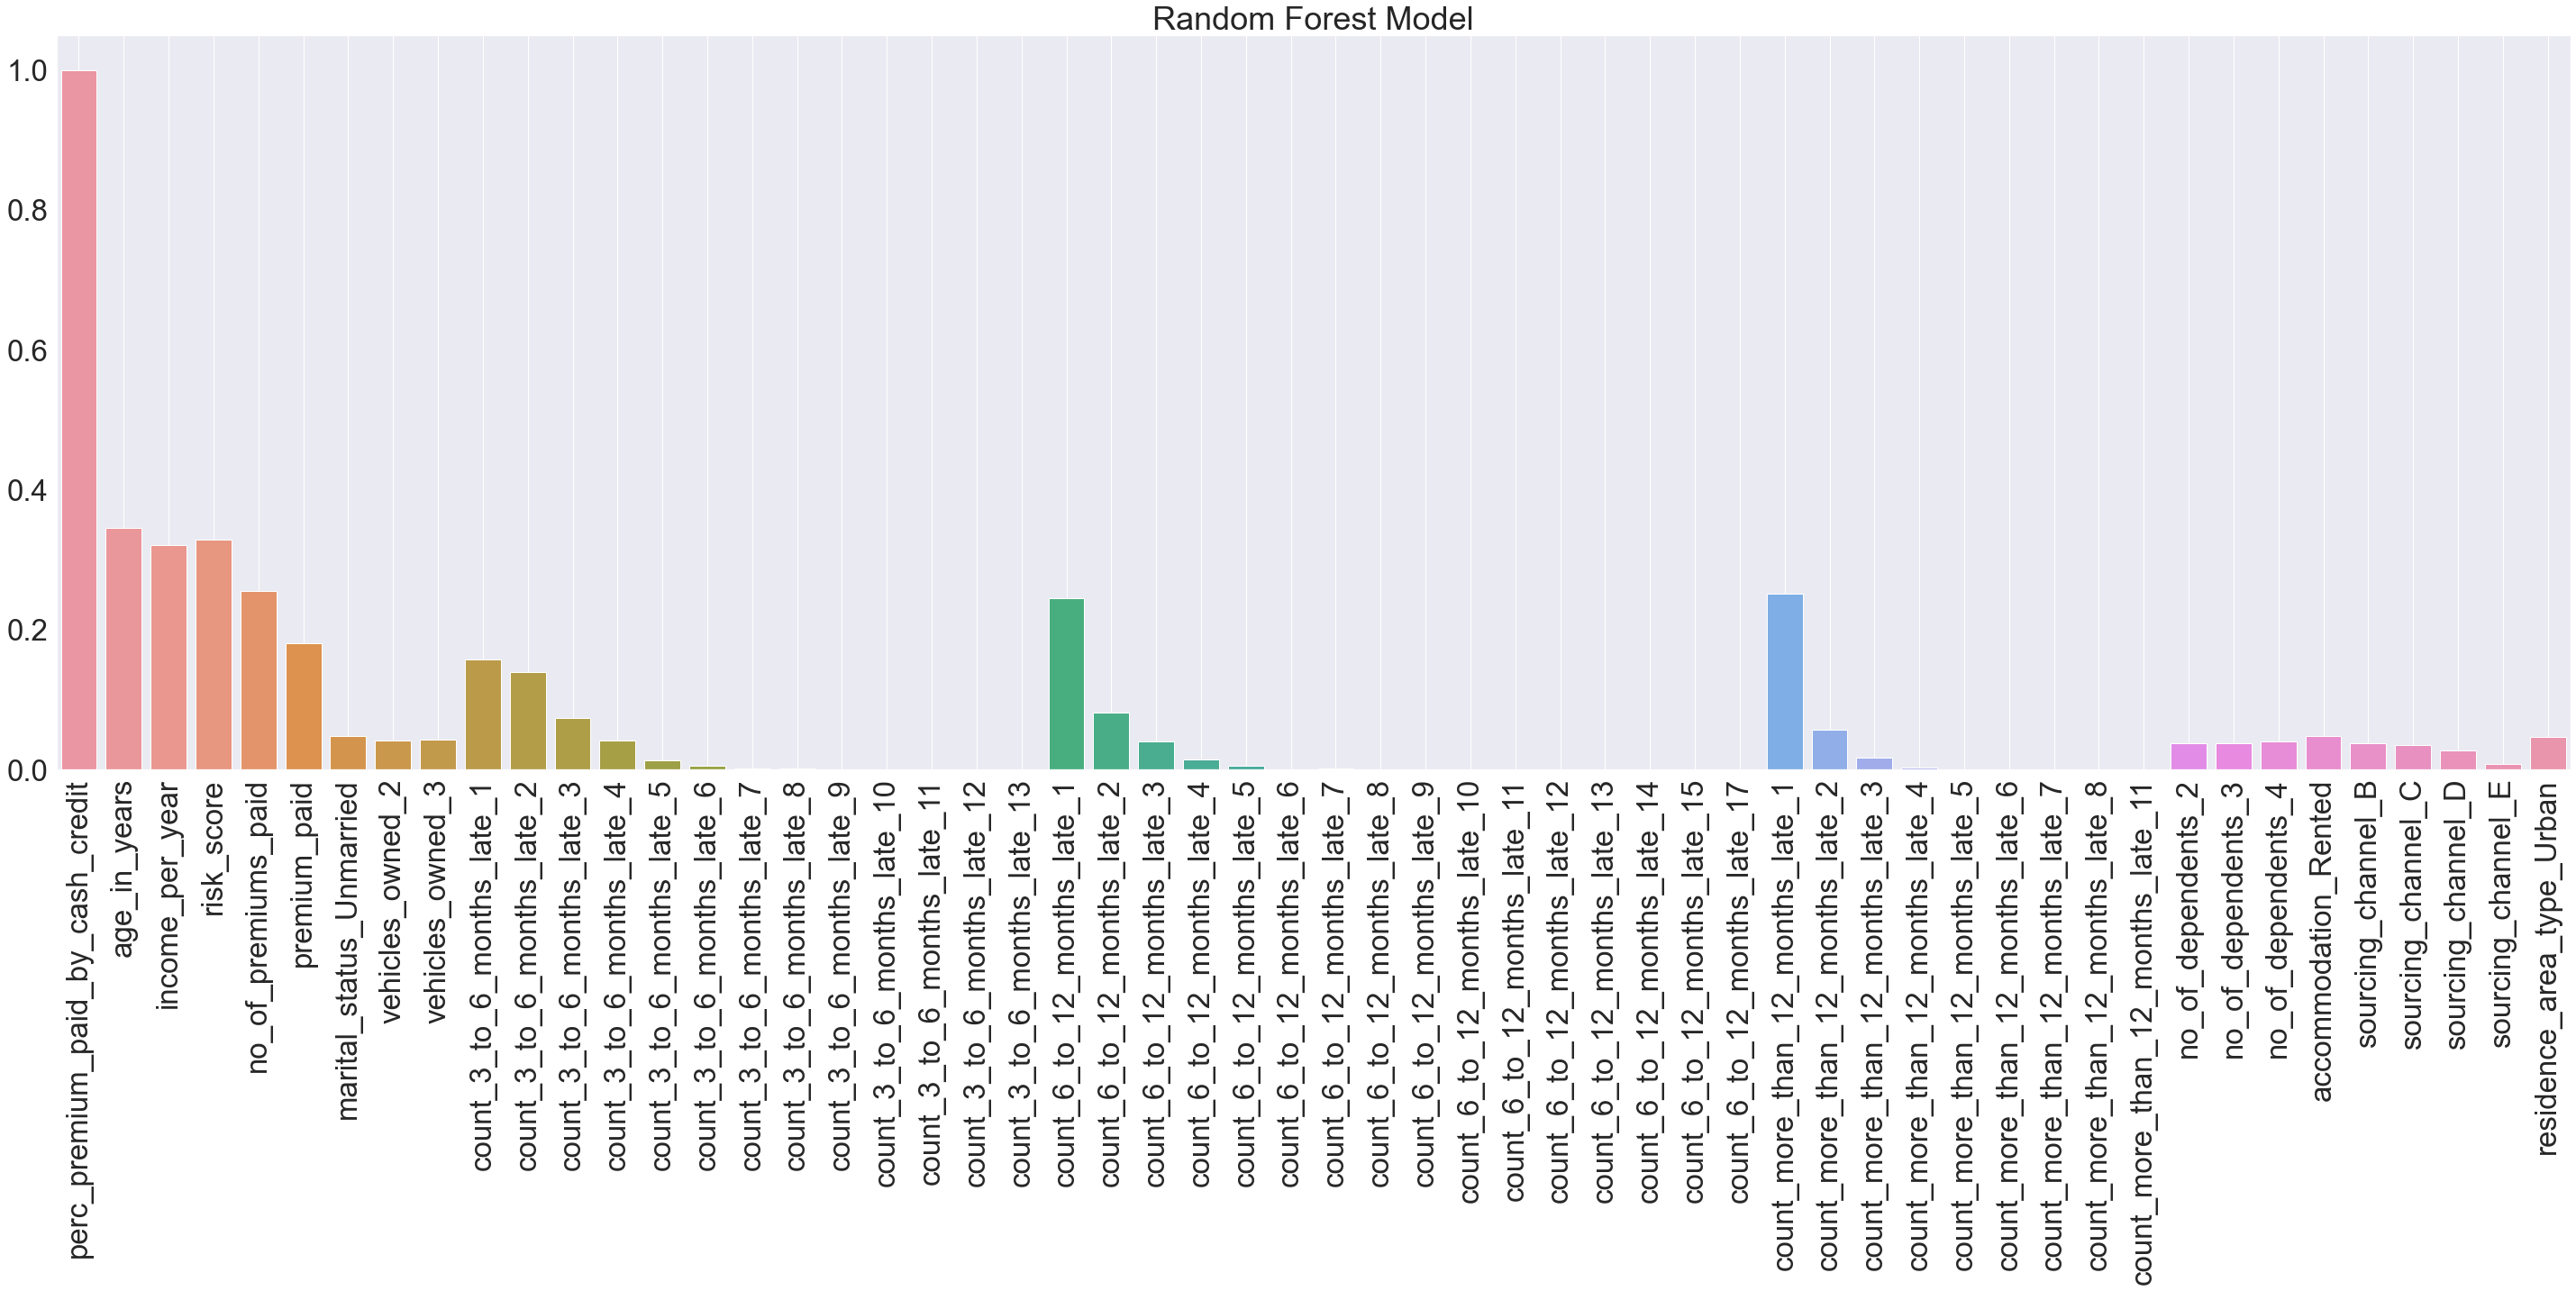

In [91]:
# Random Forest
feature_importance=m2.feature_importances_/np.max(m2.feature_importances_)
sns.set(font_scale = 3)
plt.figure(figsize=(50, 15))
plot = sns.barplot(x=X.columns, y=feature_importance)
plt.setp(plot.get_xticklabels(), rotation=90)
plt.grid()
plt.title("Random Forest Model")
plt.show()

### Feature Importance for Logistic Regression

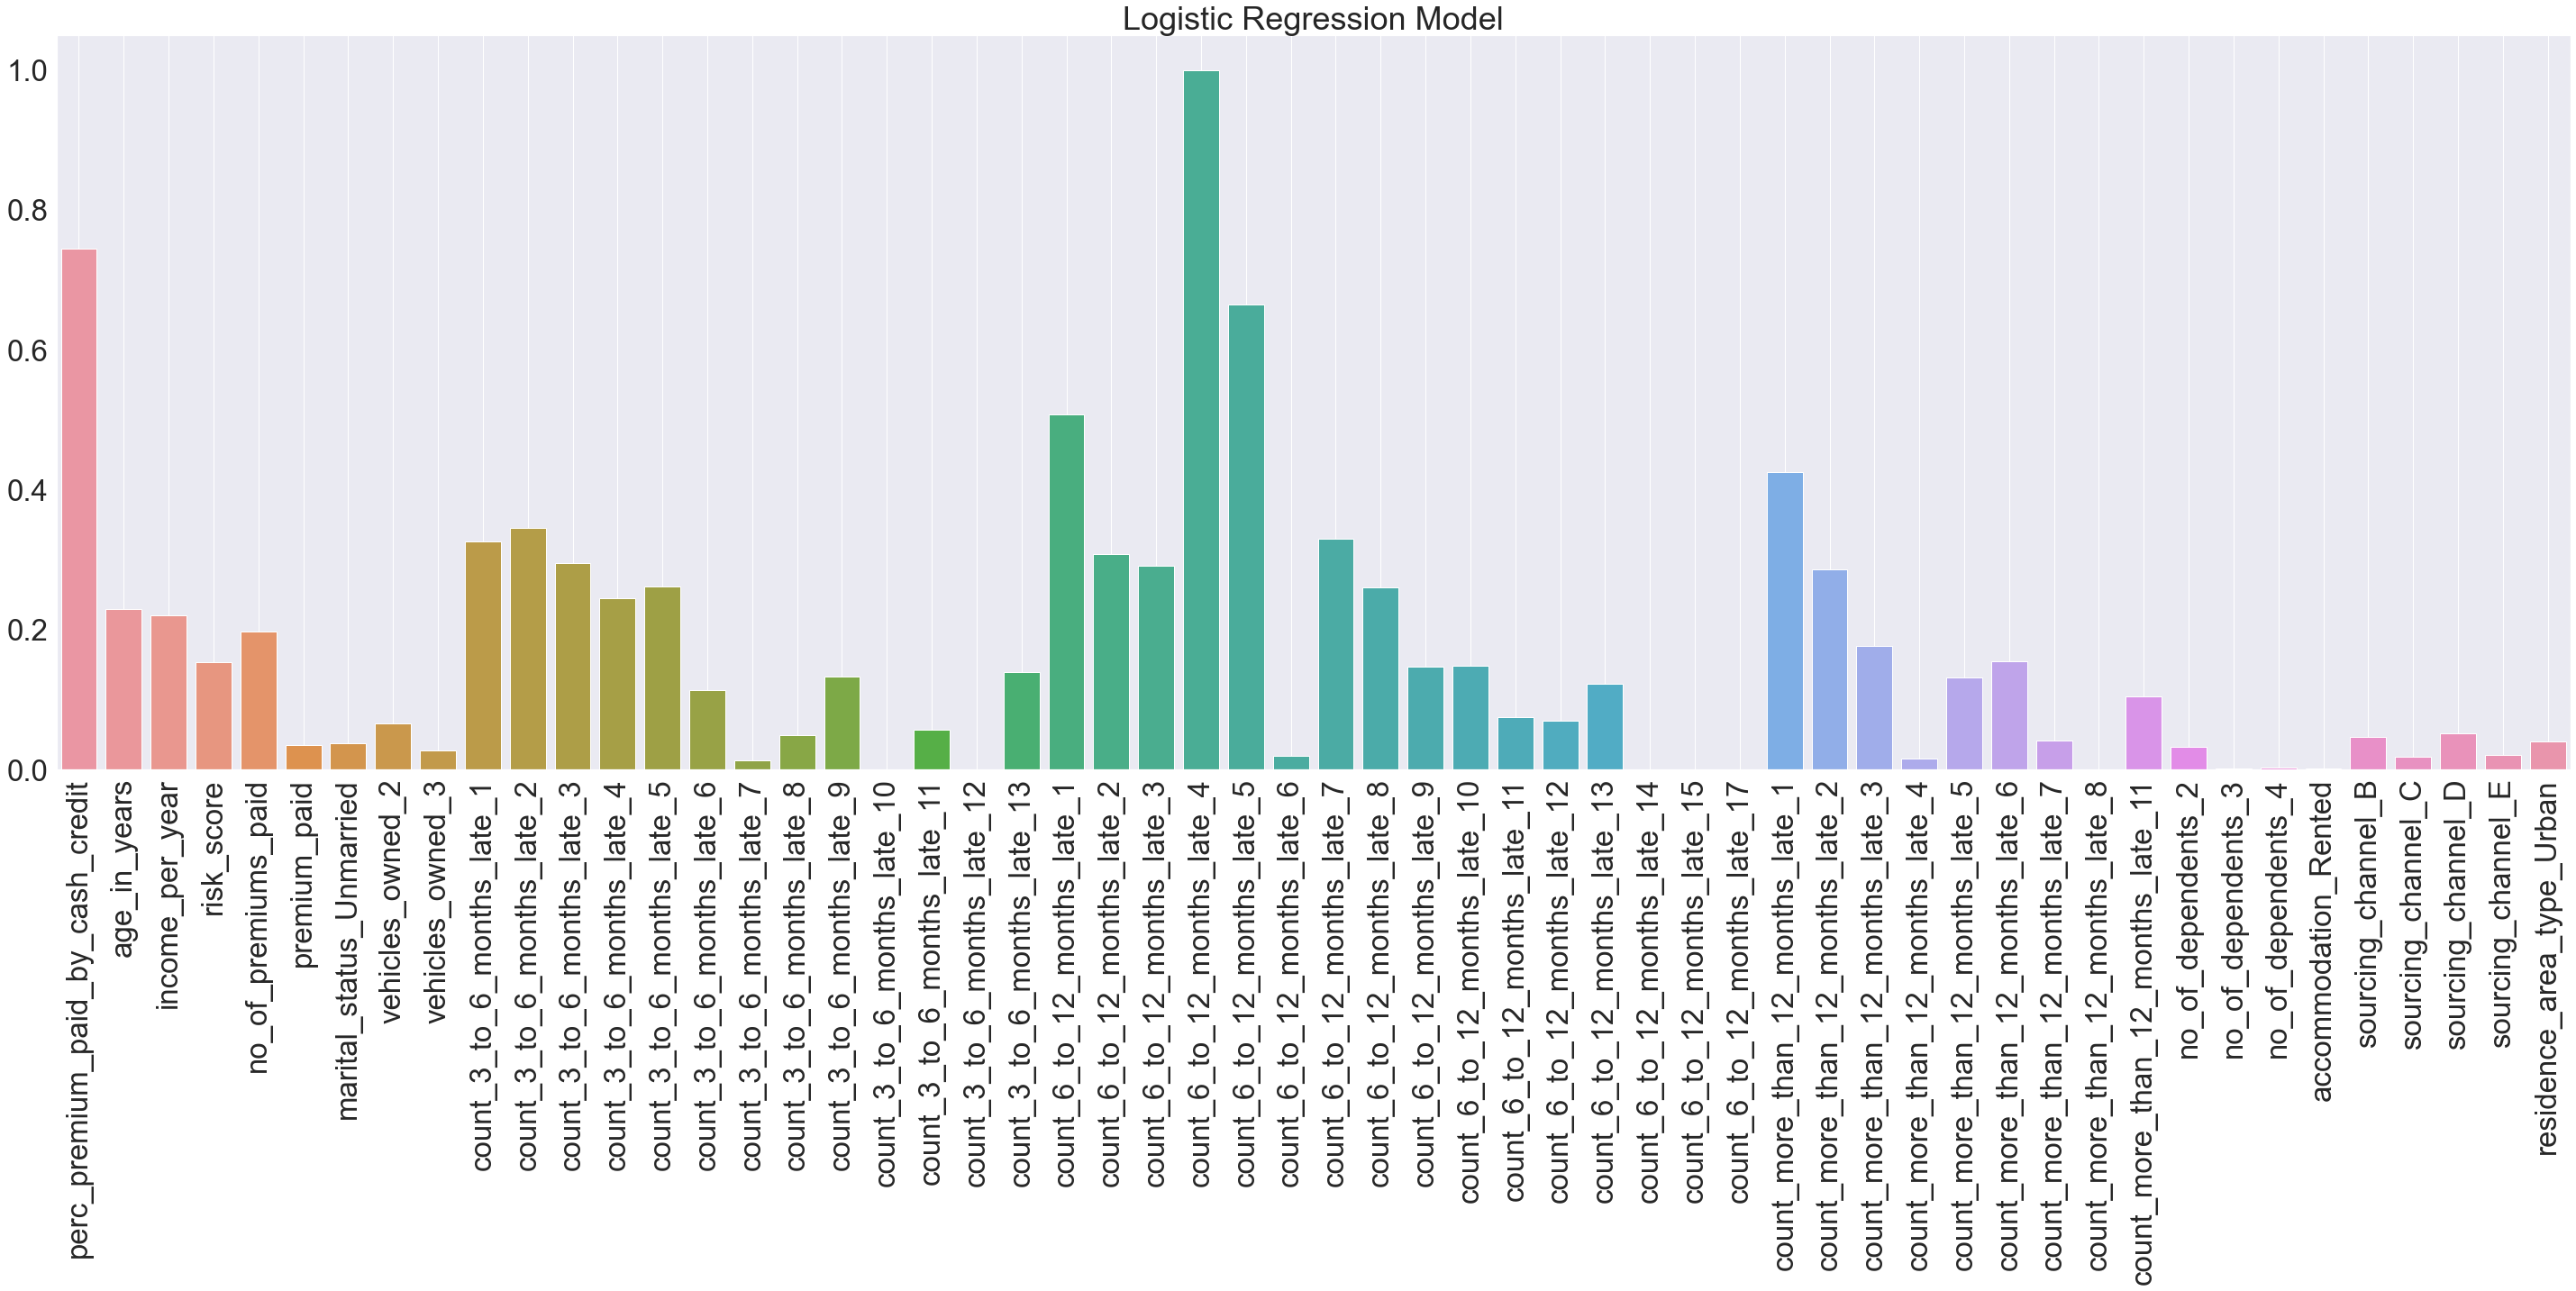

In [92]:
# Logistic Regression
feature_importance = abs(m3.coef_[0])
feature_importance = feature_importance / feature_importance.max()
sns.set(font_scale = 3)
plt.figure(figsize=(50, 15))
plot = sns.barplot(x=X.columns, y=feature_importance)
plt.setp(plot.get_xticklabels(), rotation=90)
plt.grid()
plt.title("Logistic Regression Model")
plt.show()

Interestingly, both **Random Forest** and **Logistic Regression** have different predictors that they deem as important to them. Some features hold similar importance, while others do not.

It can be concluded that these 2 models are very different from each other. In practice, it would make sense to use both of them.

## Demonstration of Models
Now that we have 2 recommended working models, let's use these models right now so that we can see upfront on how they would predict the next client.

For this to happen, we shall create a mock client with a mock profile and use him/her as an example (or out-of-sample profile):

In [93]:
# Load out-of-sample data
client = pd.read_excel('next_customer.xlsx')
idc=client['id']
client.index=idc
client.head()

,id,perc_premium_paid_by_cash_credit,age_in_days,Income,Count_3-6_months_late,Count_6-12_months_late,Count_more_than_12_months_late,Marital Status,Veh_Owned,No_of_dep,Accomodation,risk_score,no_of_premiums_paid,sourcing_channel,residence_area_type,premium,default
id,,,,,,,,,,,,,,,,,
79854,79854,0.72,16802,198120,0,1,1,0,3,2,0,99.07,0,A,Urban,11700,0


We will have to clean the data as we had done so at the start for original df.

In [94]:
# Format data of next client as per start
client = client.rename(columns = {
    'Income': 'income_per_year',
    'age_in_days': 'age_in_years',
    'Marital Status': 'marital_status',
    'Veh_Owned': 'vehicles_owned',
    'Count_3-6_months_late': 'count_3_to_6_months_late',
    'Count_6-12_months_late': 'count_6_to_12_months_late',
    'Count_more_than_12_months_late': 'count_more_than_12_months_late',
    'Risk_score': 'risk_score',
    'No_of_dep': 'no_of_dependents',
    'Accomodation': 'accommodation',
    'premium': 'premium_paid'
    },inplace = False)

# Rename elements for martial_status, accommodation and default
client['marital_status'] = client['marital_status'].astype(str)
client['accommodation'] = client['accommodation'].astype(str)
client['default'] = client['default'].astype(str)

client['marital_status'] = client['marital_status'].replace({'1': 'Married', '0': 'Unmarried'})
client['accommodation'] = client['accommodation'].replace({'1': 'Owned', '0': 'Rented'})
client['default'] = client['default'].replace({'1': 'Non-Defaulter', '0': 'Defaulter'})

client['age_in_years'] = round(client['age_in_years']/365)

client.index = client['id'] # Setting variable ID as an index
client = client.drop(['id'], axis = 1) # Delete ID, whereby axis refers to column

client['marital_status'] = client['marital_status'].astype(object)
client['vehicles_owned'] = client['vehicles_owned'].astype(object)
client['count_3_to_6_months_late'] = client['count_3_to_6_months_late'].astype(object)
client['count_6_to_12_months_late'] = client['count_6_to_12_months_late'].astype(object)
client['count_more_than_12_months_late'] = client['count_more_than_12_months_late'].astype(object)
client['no_of_dependents'] = client['no_of_dependents'].astype(object)
client['accommodation'] = client['accommodation'].astype(object)
client['sourcing_channel'] = client['sourcing_channel'].astype(object)
client['residence_area_type'] = client['residence_area_type'].astype(object)
client['default'] = client['default'].astype(object)

client = client.drop(['default'], axis = 1) # Delete default column

client.income_per_year = np.log(client.income_per_year)

client.head(5) # Print first 5 rows

,perc_premium_paid_by_cash_credit,age_in_years,income_per_year,count_3_to_6_months_late,count_6_to_12_months_late,count_more_than_12_months_late,marital_status,vehicles_owned,no_of_dependents,accommodation,risk_score,no_of_premiums_paid,sourcing_channel,residence_area_type,premium_paid
id,,,,,,,,,,,,,,,
79854,0.72,46.00,12.20,0,1,1,Unmarried,3,2,Rented,99.07,0,A,Urban,11700


Here, we have successfully created a new client called ID 79854, with the given mock characteristics.

In [95]:
client.shape

(1, 15)

We shall try to predict whether this new client will default his or her premium payment using the earlier mentioned two models.

To begin, let's delete the default variable and add this new client to the end of the source data with its new information:

In [96]:
df2 = source_df.drop(['default'], axis=1)
df2 = df2.append(client, sort=True)
df2.shape

(79854, 15)

After doing this, we will convert the catergocial variables into dummy codes.

In [97]:
df3 = pd.get_dummies(data=df2, columns=categoricals, drop_first=True)
df3.shape

(79854, 56)

Similar to how we had been doing it at the start, now that we have obtained the dummy codes for our new data, we can scale our predictors with mean = 0 and sd = 1.

In [98]:
sdf4 = pd.DataFrame(mm_scaler.fit_transform(df3),columns=df3.columns.values, index=df3.index.values)
sdf4.describe()

,age_in_years,income_per_year,no_of_premiums_paid,perc_premium_paid_by_cash_credit,premium_paid,risk_score,marital_status_Unmarried,vehicles_owned_2,vehicles_owned_3,count_3_to_6_months_late_1,...,count_more_than_12_months_late_11,no_of_dependents_2,no_of_dependents_3,no_of_dependents_4,accommodation_Rented,sourcing_channel_B,sourcing_channel_C,sourcing_channel_D,sourcing_channel_E,residence_area_type_Urban
count,79854.00,79854.00,79854.00,79854.00,79854.00,79854.00,79854.00,79854.00,79854.00,79854.00,...,79854.00,79854.00,79854.00,79854.00,79854.00,79854.00,79854.00,79854.00,79854.00,79854.00
mean,-0.00,0.00,-0.00,-0.00,0.00,0.00,-0.00,-0.00,0.00,0.00,...,0.00,0.00,0.00,-0.00,0.00,0.00,-0.00,-0.00,0.00,-0.00
std,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,...,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00
min,-2.14,-2.90,-2.10,-0.94,-1.03,-9.87,-1.00,-0.71,-0.71,-0.35,...,-0.00,-0.58,-0.58,-0.58,-1.00,-0.51,-0.42,-0.32,-0.09,-1.23
25%,-0.74,-0.63,-0.75,-0.84,-0.59,-0.33,-1.00,-0.71,-0.71,-0.35,...,-0.00,-0.58,-0.58,-0.58,-1.00,-0.51,-0.42,-0.32,-0.09,-1.23
50%,-0.04,0.03,-0.17,-0.44,-0.36,0.16,1.00,-0.71,-0.71,-0.35,...,-0.00,-0.58,-0.58,-0.58,-1.00,-0.51,-0.42,-0.32,-0.09,0.81
75%,0.73,0.66,0.61,0.67,0.31,0.62,1.00,1.42,1.42,-0.35,...,-0.00,-0.58,1.72,-0.58,1.00,-0.51,-0.42,-0.32,-0.09,0.81
max,3.60,9.56,9.50,2.05,5.22,1.13,1.00,1.42,1.42,2.84,...,282.58,1.74,1.72,1.74,1.00,1.96,2.37,3.09,11.41,0.81


Everything looks alright. Let's now take our new client's new characteristics from this dataset:

In [99]:
n_client=sdf4.iloc[sdf4.shape[0]-1,:]
n_client=pd.DataFrame(n_client).transpose()
n_client

,age_in_years,income_per_year,no_of_premiums_paid,perc_premium_paid_by_cash_credit,premium_paid,risk_score,marital_status_Unmarried,vehicles_owned_2,vehicles_owned_3,count_3_to_6_months_late_1,...,count_more_than_12_months_late_11,no_of_dependents_2,no_of_dependents_3,no_of_dependents_4,accommodation_Rented,sourcing_channel_B,sourcing_channel_C,sourcing_channel_D,sourcing_channel_E,residence_area_type_Urban
79854,-0.39,0.29,-2.10,1.21,0.08,-0.00,1.00,-0.71,1.42,-0.35,...,-0.00,1.74,-0.58,-0.58,1.00,-0.51,-0.42,-0.32,-0.09,0.81


And predict the new client using both **Random Forest** and **Logistic Regression**.

In [100]:
rf_pr = m2.predict(n_client) # Random Forest prediction
lr_pr = m3.predict(n_client) # Logistic Regression prediction

# Print results
print("Random Forest prediction:",rf_pr)
print("Logistic Regression prediction:",lr_pr)

Random Forest prediction: ['Defaulter']
Logistic Regression prediction: ['Defaulter']


Interestingly, both models predicted that this new client would most likely default.

As we continue to run the models with new data and observe their predictions, we can then possibly determine their reliability in the future.

# Conclusion


In conclusion, with regards to EDA, we have analyzed that **Defaulters** (while younger relative to **Non-Defaulters**) are still in their 40s. They mostly pay their premiums in cash, earn lesser than **Non-Defaulters**, have a lower risk score and paid lesser premiums in totality. They also tend to be unmarried, live in urban areas and largely use sourcing channel A.

We can draw assumptions that either they are going through a mid-life crisis, or simply can no longer be bothered to be responsible to anyone.

With these assumptions, the insurance company might be interested to know if the above assumptions are true. If so, the firm might then be interested to know if they are able to create a model to predict if a customer of such profile is likely to default his or her premium payment.

With regards to our prediction models, we can see how the different configurations affect a model's performance. In addition, we can see how each different model works.


We first started off with the **Decision Tree** Model; the building block of a random forest. To enhance the Decision Tree Model, we  further pruned it.

We then used the **Random Forest** Model, a combination of hundreds of decision trees also known as the ensemble model, which involves the concepts of random sampling of observations, features and averaging predictions.

The **Random Forest** gave us a better result than the  **Decision Tree**. It was of decent accuracy too.

Finally, we built the Logistic Regression model. While different from the **Random Forest** Model, this model is simpler. Nevertheless, the results were close to the **Random Forest's** (both around 75%).

Although both **Random Forest** and **Logistic Regression** have given decent results, we could possibly explore more complex models like **Deep Neural Network** to determine both models' accuracy practice limit.

In any case, now that we have a comparison of 3 models, we recommended to apply both the **Random Forest** and **Logistic Regression** to practice. 75% is after all, a decent result given the nature of customer profiling and behaviour which is hard to predict.

One thing to note is that both **Random Forest** and **Logistic Regression** view their features differently when it comes to their importance. Some of them held similar importance as per both models, while some do not. It can be thus be concluded that  these 2 models are very different from one other. In practice, it would be reasonable to use both of them.

As shown in the demonstration, both have predicted the 'new' client as a potential defaulter, given the mock characteristics that whereby some of its profile is similar to that of a defaulter as analyzed in the earlier EDA.

Perhaps when more predictions get matched along the way, we can then determine the models to be reliable.


# Recommendation


Going forward, the insurance company will have to price the premiums accordingly to the profile of the individuals, with consideration to the mentioned variables that are clearly homogeneous.

It should be noted however, that the nature of insurance companies and that of credit card companies are a little different.

Credit card companies have a right to demand payment from a customer due to the loan and interest owed.

Insurance companies however, do not have that right. The nature of that is like a 'subscription'. For as long as the client consistently pays his or her premium on time, he or she will continue to be covered by insurance. Should they stop paying, they simply forfeit the coverage.

With that in mind, the insurance company can then consider looking into extending the deadline of premium payments for these types of customer profile to reduce the number of defaulters.